# <h1><center>Tune Stationary Shape</center></h1>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy.plotting import plot
from matplotlib import cm

## Test Digit growth

### parameters

In [2]:
L = 1
NB_POINTS = 500
T = 1
a = 4
init_x = np.linspace(-L/2, L/2, NB_POINTS)
lbda = 0.2

In [3]:
print(init_x)

[-0.5        -0.49799599 -0.49599198 -0.49398798 -0.49198397 -0.48997996
 -0.48797595 -0.48597194 -0.48396794 -0.48196393 -0.47995992 -0.47795591
 -0.4759519  -0.4739479  -0.47194389 -0.46993988 -0.46793587 -0.46593186
 -0.46392786 -0.46192385 -0.45991984 -0.45791583 -0.45591182 -0.45390782
 -0.45190381 -0.4498998  -0.44789579 -0.44589178 -0.44388778 -0.44188377
 -0.43987976 -0.43787575 -0.43587174 -0.43386774 -0.43186373 -0.42985972
 -0.42785571 -0.4258517  -0.4238477  -0.42184369 -0.41983968 -0.41783567
 -0.41583166 -0.41382766 -0.41182365 -0.40981964 -0.40781563 -0.40581162
 -0.40380762 -0.40180361 -0.3997996  -0.39779559 -0.39579158 -0.39378758
 -0.39178357 -0.38977956 -0.38777555 -0.38577154 -0.38376754 -0.38176353
 -0.37975952 -0.37775551 -0.3757515  -0.37374749 -0.37174349 -0.36973948
 -0.36773547 -0.36573146 -0.36372745 -0.36172345 -0.35971944 -0.35771543
 -0.35571142 -0.35370741 -0.35170341 -0.3496994  -0.34769539 -0.34569138
 -0.34368737 -0.34168337 -0.33967936 -0.33767535 -0

### finger function

In [4]:
def normal_growth(x, T, a):
    # T norm of the translation vector
    # x position of a point on the x axis
    # a constant
    
    K = 2 * math.pi / L     # or K = 2 * math.pi
    
    if isinstance(x,np.ndarray) or isinstance(x,list):
        result = x.copy()
        ins_bound = np.where(abs(x) <= L/2)[0]     # or 1/2 instead of L/2
        out_bound = np.where(abs(x) > L/2)[0]
        result[ins_bound] = T / (a + 2) * (1 + a + np.cos(K * x[ins_bound]))
        result[out_bound] = T * a / (a + 2)
    
    elif isinstance(x,int):
        if abs(x) <= L/2:
            result = T / (a + 2) * (1 + a + math.cos(K * x))
        else:
            result = T * a / (a + 2)
    return(result)

### issue local variable 'result' referenced before assignment if x is an integer

In [5]:
def normal_growth(x, T, a):
    # T norm of the translation vector
    # x position of a point on the x axis
    # a constant
    
    K = 2 * math.pi / L     # or K = 2 * math.pi
    
    result = T / (a + 2) * (1 + a + np.cos(K * x))

    return(result)

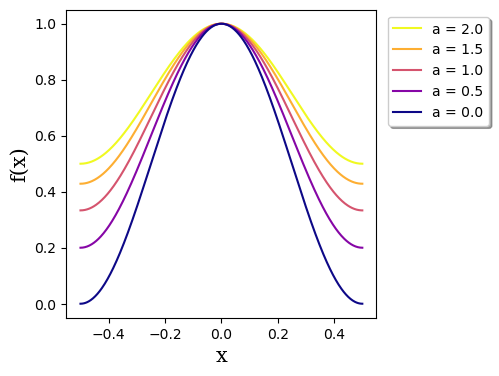

In [6]:
fig1 = plt.figure(figsize = (4,4))

x_lab = 'x'
y_lab = 'f(x)'

plt.xlabel(x_lab, fontsize = 15, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 15, fontfamily='serif')
viridis = cm.get_cmap('plasma', 12)

for a in np.flip(np.arange(0,2.5,0.5)):
    y = normal_growth(init_x, T, a)
    viridis_value = a  / 2
    plt.plot(init_x, y, label = f"a = {a}", color=viridis(viridis_value))
    
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
#fig1.savefig("growth_function_variation.pdf", bbox_inches='tight') 

### dy/dx

In [7]:
def slope(x, T, a):
    # T norm of the translation vector
    # x position of a point on the x axis
    # a constant
    
    if isinstance(x,np.ndarray) or isinstance(x,list):
        y__prime = np.sqrt((T / normal_growth(x, T, a))**2 - 1)
    
    elif isinstance(x,int):
        print('int')
        y__prime = math.sqrt((T / normal_growth(x, T, a))**2 - 1)
    return(y__prime)

In [8]:
def slope(x, T, a):
    # T norm of the translation vector
    # x position of a point on the x axis
    # a constant
    
    #y__prime = - np.sign(init_x) *  np.sqrt((T / normal_growth(x, T, a))**2 - 1
    
    y__prime = np.sqrt((T / normal_growth(x, T, a))**2 - 1)

    return(y__prime)

careful to the sign of dy dx

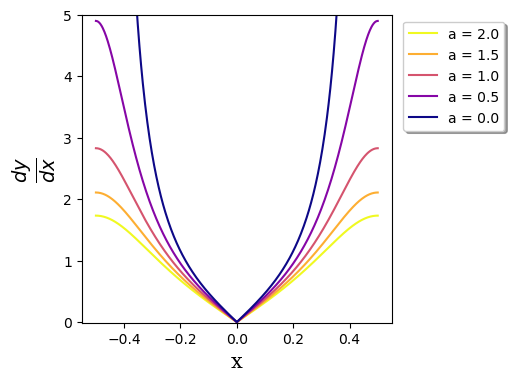

In [9]:
fig2 = plt.figure(figsize = (4,4))

x_lab = 'x'
y_lab = r'$\frac{dy}{dx}$'

plt.xlabel(x_lab, fontsize = 15, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 20, fontfamily='serif')

plt.ylim([- 0.01, 5])
viridis = cm.get_cmap('plasma', 12)

for a in np.flip(np.arange(0.00000001,2.5,0.5)):
    y_prime = slope(init_x, T, a)
    viridis_value = a  / 2
    plt.plot(init_x, y_prime, label = f"a = {a:.1f}", color=viridis(viridis_value))
    
    
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
#fig2.savefig("dy_dx_variation.pdf", bbox_inches='tight') 

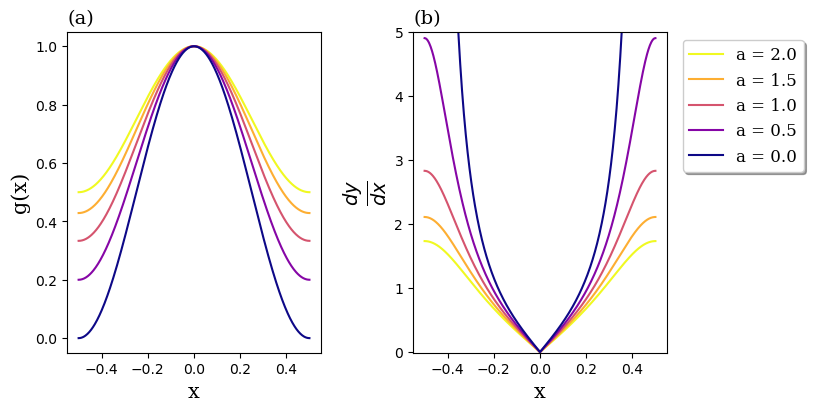

In [10]:
fig_comp = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig_comp.add_gridspec(1, 2, wspace = 0.04, hspace = 0.5, bottom = 0.2)

# Plot 1
ax1 = fig_comp.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = 'g(x)'

ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
viridis = cm.get_cmap('plasma', 12)

for a in np.flip(np.arange(0,2.5,0.5)):
    y = normal_growth(init_x, T, a)
    viridis_value = a  / 2
    ax1.plot(init_x, y, label = f"a = {a}", color=viridis(viridis_value))


# Plot 2
ax2 = fig_comp.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = r'$\frac{dy}{dx}$'

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 20, fontfamily='serif')

ax2.set_ylim([- 0.01, 5])
viridis = cm.get_cmap('plasma', 12)

for a in np.flip(np.arange(0.00000001,2.5,0.5)):
    y_prime = slope(init_x, T, a)
    viridis_value = a  / 2
    ax2.plot(init_x, y_prime, label = f"a = {a:.1f}", color=viridis(viridis_value))

# Legend

ax2.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})

plt.show()
fig_comp.savefig("function_derivate.pdf", bbox_inches='tight') 

### derivate

dif, a = 0: -3.14159265358979*sin(6.28318530717959*x)
dif, a = 1: -2.0943951023932*sin(6.28318530717959*x)
dif, a = 2: -1.5707963267949*sin(6.28318530717959*x)
dif, a = 3: -1.25663706143592*sin(6.28318530717959*x)


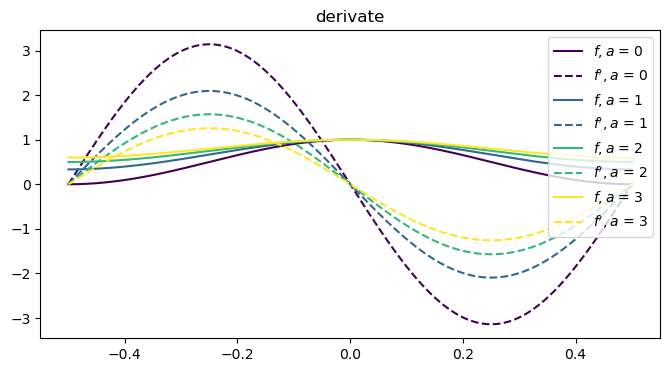

In [11]:
K =  2 * math.pi / L
x = sp.symbols('x')

fig = plt.figure(figsize = (8,4))
plt.title('derivate')
viridis = cm.get_cmap('viridis', 4)

for a in range(4):
    expr = T / (a + 2) * (1 + a + sp.cos(K * x))
    first_deriv = expr.diff(x)
    print(f"dif, a = {a}:", first_deriv)
    # numerical evaluation using substitution
    deriv_numerical_solution = [first_deriv.subs({x: point}) for point in init_x]
    expr_numerical_solution = [expr.subs({x: point}) for point in init_x]
    
    viridis_value = a     
    plt.plot(init_x, expr_numerical_solution, label = f"$f, a$ = {a}", color=viridis(viridis_value), linestyle = 'solid')
    plt.plot(init_x, deriv_numerical_solution, label = f"$f', a$ = {a}", color=viridis(viridis_value), linestyle = 'dashed')
plt.legend()

### stationary shape

It's the integral of $\frac{dy}{dx}$ over x

In [12]:
def deriv_integ_middle(x_vec, T, a):
        
    normal_speed = normal_growth(x_vec, T, a) # to avoid divisions by zero
    deriv_slope = np.sqrt((T / normal_speed )**2 - 1)
    finger = np.zeros(deriv_slope.shape)
    
    if (len(finger) % 2) == 0:
        finger[:int(len(finger) / 2) - 1] = np.flip(np.cumsum(np.flip(deriv_slope[:int(len(finger)/2 -1)])))
        finger[int(len(finger) / 2):] = np.cumsum(deriv_slope[int(len(finger)/2):])
    else:
        finger[:int(len(finger) / 2)] = np.flip(np.cumsum(np.flip(deriv_slope[:int(len(finger)/2)])))
        finger[int(len(finger) / 2):] = np.cumsum(deriv_slope[int(len(finger)/2):])
        
    return(finger)

In [13]:
def deriv_integ_border(x_vec, T, a):
        
    #normal_speed = normal_growth(x_vec, T, a) # to avaid divisions by zero
    #deriv_slope = np.sqrt((T / normal_speed )**2 - 1)
    deriv_slope = slope(x_vec, T, a)
    finger = np.zeros(deriv_slope.shape)
    
    finger[:int(len(finger) / 2)] = np.cumsum(deriv_slope[:int(len(finger)/2)])
    finger[int(len(finger) / 2):] = np.flip(np.cumsum(np.flip(deriv_slope[int(len(finger)/2):])))

    return(finger)

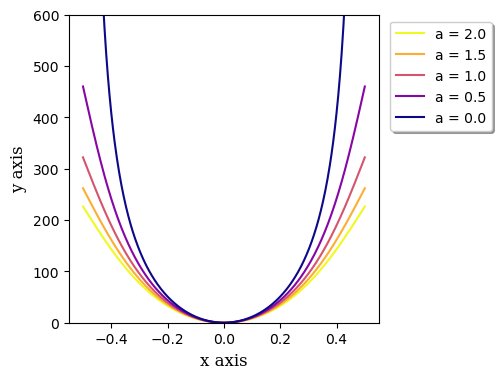

In [14]:
fig3 = plt.figure(figsize = (4,4))

x_lab = 'x axis'
y_lab = 'y axis'


plt.xlabel(x_lab, fontsize = 12, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 12, fontfamily='serif')

#plt.title('Stationary shape')
viridis = cm.get_cmap('plasma', 12)
plt.ylim([0, 600])
for a in [2.0, 1.5, 1.0, 0.5, 0.00001]:
    y = deriv_integ_middle(init_x, T, a)
    viridis_value = a  / 2
    plt.plot(init_x, y , label = f"a = {a:.1f}", color=viridis(viridis_value))
    
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig3.savefig("stationnary_upside_down.pdf", bbox_inches='tight') 

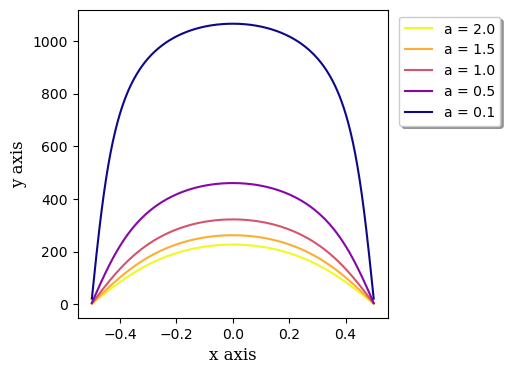

In [15]:
fig4 = plt.figure(figsize = (4,4))

x_lab = 'x axis'
y_lab = 'y axis'


plt.xlabel(x_lab, fontsize = 12, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 12, fontfamily='serif')

#plt.title('Stationary shape')

viridis = cm.get_cmap('plasma', 12)
for a in [2.0, 1.5, 1.0, 0.5, 0.1]:
    y = deriv_integ_border(init_x, T, a)
    viridis_value = a  / 2
    plt.plot(init_x, y , label = f"a = {a}", color=viridis(viridis_value))
    
    
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig4.savefig("stationnary_upside_down.pdf", bbox_inches='tight') 

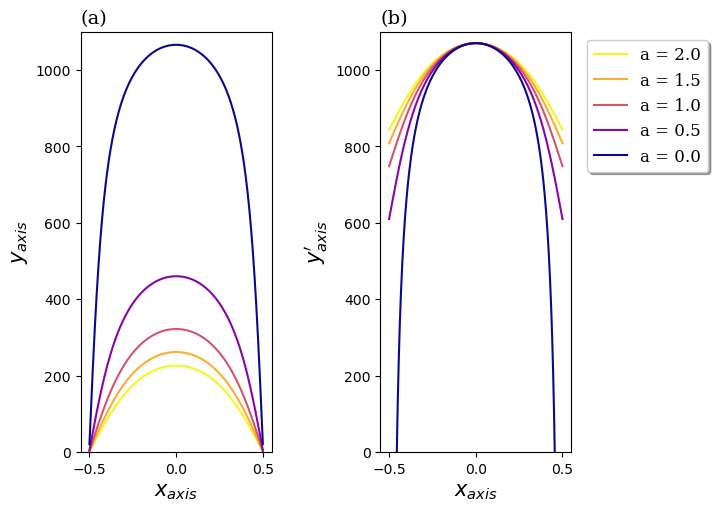

In [16]:
fig3 = plt.figure(constrained_layout=True, figsize = (7,5))
gs = fig3.add_gridspec(1, 2, wspace = 0.08, hspace = 0.5, bottom = 0.2)

# STATIONARY SCALED

ax1 = fig3.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)
ax1.set_ylim([0, 600])
viridis = cm.get_cmap('plasma', 12)
for a in [2.0, 1.5, 1.0, 0.5, 0.1]:
    y = deriv_integ_border(init_x, T, a)
    viridis_value = a  / 2
    ax1.plot(init_x, y , label = f"a = {a}", color=viridis(viridis_value))
    
x_lab = r'$x_{axis}$'
y_lab = r'$y_{axis}$'

ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
    

ax1.set_ylim([0, 1100])


# STATIONARY SCALED

ax3 = fig3.add_subplot(gs[:, 1])
ax3.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)
ax3.set_ylim([0, 600])
for a in [2.0, 1.5, 1.0, 0.5, 0.00001]:
    y = deriv_integ_middle(init_x, T, a)
    viridis_value = a  / 2
    ax3.plot(init_x, -y + 1070, label = f"a = {a:.1f}", color=viridis(viridis_value))
    
#ax3.set_xlabel(x_lab, fontsize = 12, fontfamily='serif')
#ax3.set_ylabel(y_lab, fontsize = 12, fontfamily='serif')

#ax3.set_yticks([])
#ax3.set_xticks([])
ax3.set_ylim([0, 1100])

x_lab = r'$x_{axis}$'
y_lab = r'$y^{\prime}_{axis}$'

ax3.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax3.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')

plt.legend(loc='upper center', bbox_to_anchor=(1.4, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})




plt.show()
fig3.savefig("stationnary_final.pdf", bbox_inches='tight') 

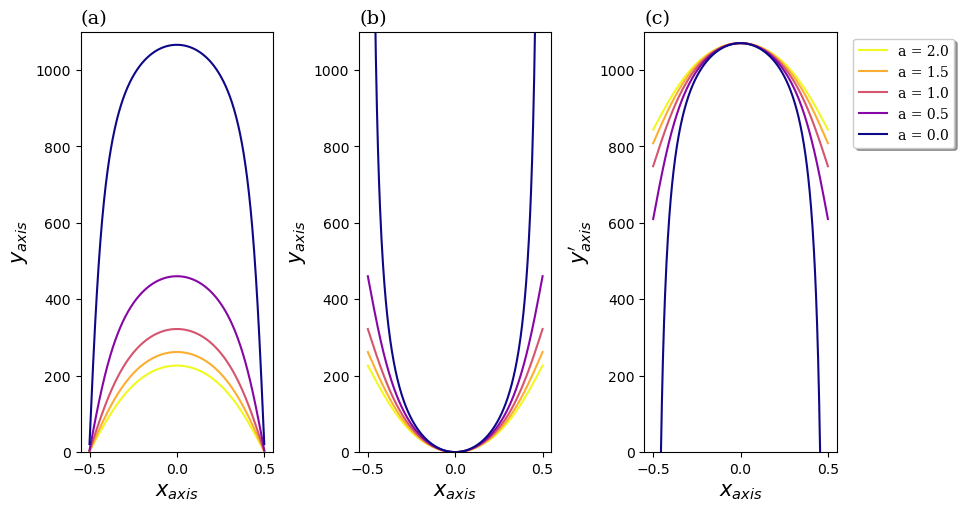

In [17]:
fig3 = plt.figure(constrained_layout=True, figsize = (9.5,5))
gs = fig3.add_gridspec(1, 3, wspace = 0.04, hspace = 0.1, bottom = 0.2)

# STATIONARY SCALED

ax1 = fig3.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)
ax1.set_ylim([0, 600])
viridis = cm.get_cmap('plasma', 12)
for a in [2.0, 1.5, 1.0, 0.5, 0.1]:
    y = deriv_integ_border(init_x, T, a)
    viridis_value = a  / 2
    ax1.plot(init_x, y , label = f"a = {a}", color=viridis(viridis_value))
    
x_lab = r'$x_{axis}$'
y_lab = r'$y_{axis}$'

ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
    

ax1.set_ylim([0, 1100])

# STATIONARY SCALED UPSIDE DOWN

ax2 = fig3.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)
ax2.set_ylim([0, 600])
for a in [2.0, 1.5, 1.0, 0.5, 0.00001]:
    y = deriv_integ_middle(init_x, T, a)
    viridis_value = a  / 2
    ax2.plot(init_x, y, label = f"a = {a:.1f}", color=viridis(viridis_value))
    
#ax3.set_xlabel(x_lab, fontsize = 12, fontfamily='serif')
#ax3.set_ylabel(y_lab, fontsize = 12, fontfamily='serif')

#ax3.set_yticks([])
#ax3.set_xticks([])
ax2.set_ylim([0, 1100])

x_lab = r'$x_{axis}$'
y_lab = r'$y_{axis}$'

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')




# STATIONARY SCALED

ax3 = fig3.add_subplot(gs[:, 2])
ax3.set_title("(c)", fontfamily='serif', loc='left', fontsize= 14)
ax3.set_ylim([0, 600])
for a in [2.0, 1.5, 1.0, 0.5, 0.00001]:
    y = deriv_integ_middle(init_x, T, a)
    viridis_value = a  / 2
    ax3.plot(init_x, -y + 1070, label = f"a = {a:.1f}", color=viridis(viridis_value))
    
#ax3.set_xlabel(x_lab, fontsize = 12, fontfamily='serif')
#ax3.set_ylabel(y_lab, fontsize = 12, fontfamily='serif')

#ax3.set_yticks([])
#ax3.set_xticks([])
ax3.set_ylim([0, 1100])

x_lab = r'$x_{axis}$'
y_lab = r'$y^{\prime}_{axis}$'

ax3.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax3.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')

plt.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 10, 'family': 'serif'})




plt.show()
fig3.savefig("stationnary_final.pdf", bbox_inches='tight') 

the four essential steps are:
- Import the SymPy library
- Define the symbolic variable
- Create the symbolic equation. Precede specific terms with sp to access the SymPy declarations.
- Find the nth order derivative using eq.diff(…). The number of t’s supplied to the diff function is the order of the resulting derivative.

### Iterate function

The x axis coordinates of the new vein are:
$$
  x_{T+} = x_{0} + T_{0} * sin(\theta) + cos(\theta) * \frac{\alpha}{3} 
$$
$$
  x_{T-} = x_{0} + T_{0} * sin(\theta) - cos(\theta) * \frac{\alpha}{3}
$$
$T_{0}$ is the growth distance with:
$$
T_{0} = V_{\perp} * {\partial}t = \frac{1}{2*\frac{\partial \theta}{\partial s}}
$$
$\frac{\partial \theta}{\partial s}$ is the curvature, expressed in cartesian coordinates instead of curvilinear coordinates it is: 
$$
\frac{\partial \theta}{\partial s} = \frac{\partial^2y}{\partial^2x} * \frac{1}{[1 + (\frac{\partial y}{\partial x})^2]^\frac{3}{2}}
$$

1.5062600776909343


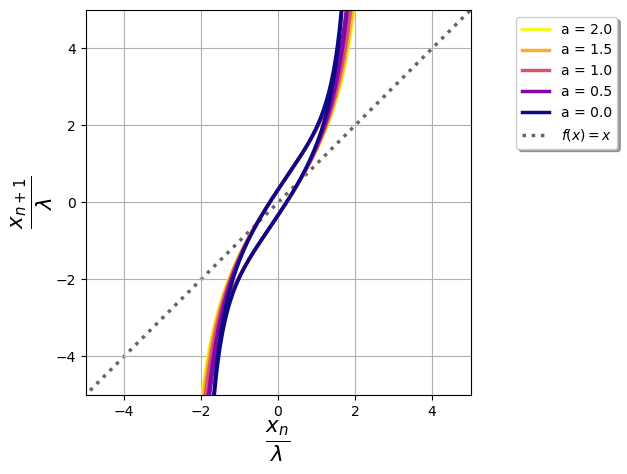

In [18]:
fig_vary_a = plt.figure(figsize = (5,5))




# initial set-up: one vein at x = 0
x0 = 0
nb_division = 30
dist_points = init_x[1:] - init_x[:-1]  # init_x are the initial x position of the front
dist_points = dist_points.mean() # suppose the distance between points is a constant
level = 30
a = 0.0001
viridis = cm.get_cmap('plasma', 12)

for a in [2.0, 1.5, 1.0, 0.5, 0.00001]:
# compute dy/dx
    slope_vec = - np.sign(init_x) * slope(init_x, T, a)

    # compute sin(theta) and cos(theta)
    sin_theta = slope_vec * 1 / np.sqrt(1 + slope_vec**2)
    cos_theta = 1 / np.sqrt(1 + slope_vec**2)

    # compute d2y/d2x
    der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dist_points   #border condition, the size of der_slop_vec is slope_vec - 1

    # compute dtheta/ds
    dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

    # compute T
    T_0 = 1 / (2 * dtheta_ds)

    # compute x1p et x1m
    x1p = init_x[1:] + T_0 * sin_theta[1:] + cos_theta[1:] * (lbda / 3)  # why don't we do a while loop on x position ?
    x1m = init_x[1:] + T_0 * sin_theta[1:] - cos_theta[1:] * (lbda / 3)
    
    viridis_value = a  / 2

    plt.plot(init_x[1:] / lbda, x1p /lbda, label = f"a = {a:.1f}", color=viridis(viridis_value), linewidth = 2.5, zorder = 2)
    plt.plot(init_x[1:] / lbda, x1m /lbda, color = viridis(viridis_value), linewidth = 2.5, zorder = 2)

# the third part is too small compared to the second  to make any difference :/

# compute slope

ind = np.where((init_x[1:] < 0.05) & (init_x[1:] > - 0.05))

X = init_x[ind] - init_x[ind].mean()
Y = x1p[ind] - x1p[ind].mean()

slope_iterate = (X.dot(Y)) / (X.dot(X))
print(slope_iterate)

plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(zorder = 0)

xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')

#plt.xticks(np.arange(-1,1.1,0.5))
#plt.yticks(np.arange(-1,1.1,0.5))

plt.grid(True, zorder = 0)


x = np.linspace(-80, 80, NB_POINTS)

plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 1)
#plt.plot(x,x*slope_iterate, color = 'black', linestyle = '-', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 1)

plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=1, fancybox=True, shadow=True)

fig_vary_a.savefig("iterate_vary_a.pdf", bbox_inches='tight') 

1.5062600776909343


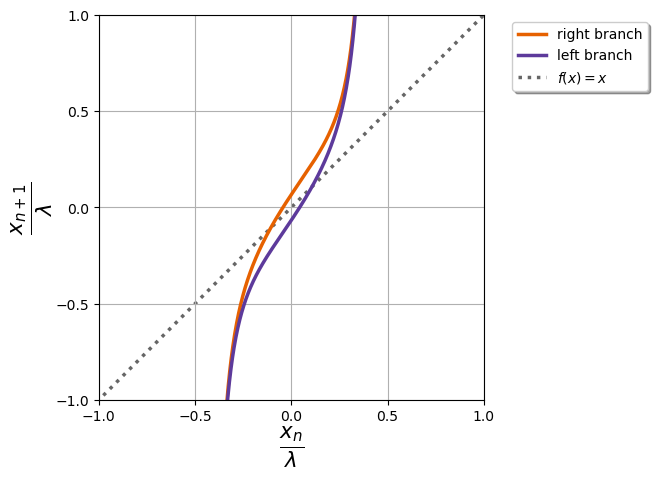

In [19]:
fig5 = plt.figure(figsize = (5,5))




# initial set-up: one vein at x = 0
x0 = 0
nb_division = 30
dist_points = init_x[1:] - init_x[:-1]  # init_x are the initial x position of the front
dist_points = dist_points.mean() # suppose the distance between points is a constant
level = 30

# compute dy/dx
slope_vec = - np.sign(init_x) * slope(init_x, T, a)
    
# compute sin(theta) and cos(theta)
sin_theta = slope_vec * 1 / np.sqrt(1 + slope_vec**2)
cos_theta = 1 / np.sqrt(1 + slope_vec**2)

# compute d2y/d2x
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dist_points   #border condition, the size of der_slop_vec is slope_vec - 1

# compute dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# compute T
T_0 = 1 / (2 * dtheta_ds)

# compute x1p et x1m
x1p = init_x[1:] + T_0 * sin_theta[1:] + cos_theta[1:] * (lbda / 3)  # why don't we do a while loop on x position ?
x1m = init_x[1:] + T_0 * sin_theta[1:] - cos_theta[1:] * (lbda / 3)

# the third part is too small compared to the second  to make any difference :/

# compute slope

ind = np.where((init_x[1:] < 0.05) & (init_x[1:] > - 0.05))

X = init_x[ind] - init_x[ind].mean()
Y = x1p[ind] - x1p[ind].mean()

slope_iterate = (X.dot(Y)) / (X.dot(X))
print(slope_iterate)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(zorder = 0)

xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')

plt.xticks(np.arange(-1,1.1,0.5))
plt.yticks(np.arange(-1,1.1,0.5))

plt.grid(True, zorder = 0)


x = np.linspace(-80, 80, NB_POINTS)

plt.plot(init_x[1:], x1p, label = 'right branch', color = '#e66100', linewidth = 2.5, zorder = 2)
plt.plot(init_x[1:], x1m, label = 'left branch', color = '#5D3A9B', linewidth = 2.5, zorder = 2)
plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 1)
#plt.plot(x,x*slope_iterate, color = 'black', linestyle = '-', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 1)

plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=1, fancybox=True, shadow=True)

fig5.savefig("iterate_model_diagonal.pdf", bbox_inches='tight') 

## Gaussian

### define gaussian function

In [20]:
#def gaussian(x, mu, sig):
    #return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)   #normalized so the integral is one

def gaussian(x, mu, sig, const):
    return const + (1 - const) * np.exp(-np.power((x - mu)/sig, 2.)/2)

In [21]:
def slope_gaussian(x, mu, sig, const):
    # T norm of the translation vector
    # x position of a point on the x axis
    # a constant
    
    y__prime = np.sqrt((T / gaussian(x, mu, sig, const))**2 - 1)
        
    return(y__prime)

### tune sigma and c

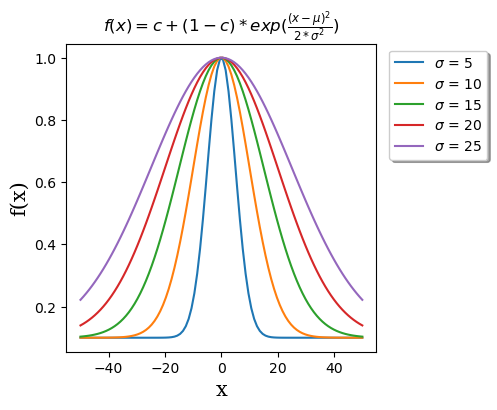

In [22]:
fig6 = plt.figure(figsize = (4,4))

#title = r'$f(x) = (1 + \frac{2 * \pi * x}{L}) * \frac{dt}{2} $'
title = r'$f(x) = c + (1-c) * exp(\frac{(x -\mu)^2}{2 * \sigma^2}) $'
xlab = 'x'
ylab = 'f(x)'
plt.xlabel(xlab, fontsize=15, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=15, fontfamily = 'serif')
plt.title(title)

x_values = np.linspace(-50, 50, 100)
for mu, sig, const in [(0, 5, 0.1), (0, 10, 0.1), (0, 15, 0.1), (0, 20, 0.1), (0, 25, 0.1)]:
    plt.plot(x_values, gaussian(x_values, mu, sig, const), label = f"$\sigma$ = {sig}")
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()

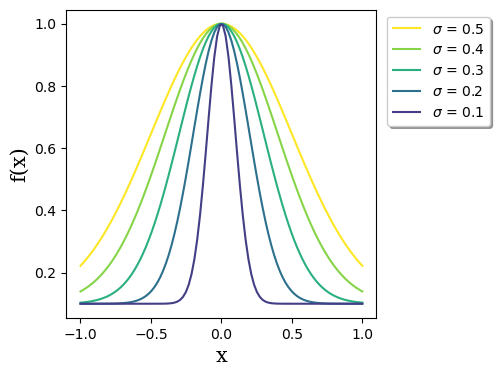

In [23]:
fig7 = plt.figure(figsize = (4,4))

#title = r'$f(x) = (1 + \frac{2 * \pi * x}{L}) * \frac{dt}{2} $'
#suptitle = "spread"
#title = r'$f(x) = c + (1-c) * exp(\frac{(x -\mu)^2}{2 * \sigma^2}) $'
xlab = 'x'
ylab = 'f(x)'
plt.xlabel(xlab, fontsize=15, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=15, fontfamily = 'serif')
viridis = cm.get_cmap('viridis', 12)

x_values = np.linspace(-1, 1, 100)
for mu, sig, const in [(0, 0.5, 0.1), (0, 0.4, 0.1), (0, 0.3, 0.1), (0, 0.2, 0.1), (0, 0.1, 0.1)]:
    viridis_value = sig  / 0.5
    plt.plot(x_values, gaussian(x_values, mu, sig, const), label = f"$\sigma$ = {sig}", color=viridis(viridis_value))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig7.savefig("gaussian_gf_vary_spread.pdf", bbox_inches='tight') 

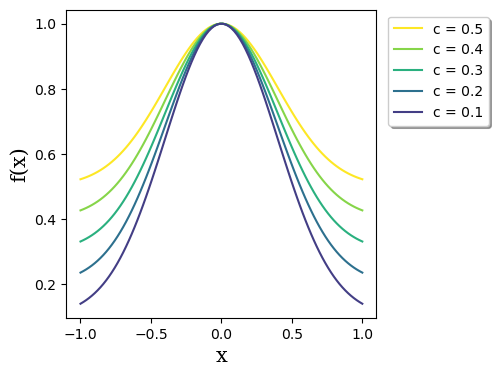

In [24]:
fig8 = plt.figure(figsize = (4,4))

#title = r'$f(x) = (1 + \frac{2 * \pi * x}{L}) * \frac{dt}{2} $'
#title = r'$f(x) = c + (1-c) * exp(\frac{(x -\mu)^2}{2 * \sigma^2}) $'
#suptitle = "margin"
xlab = 'x'
ylab = 'f(x)'
plt.xlabel(xlab, fontsize=15, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=15, fontfamily = 'serif')
viridis = cm.get_cmap('viridis', 12)
#plt.title(title)
#plt.suptitle(suptitle)

x_values = np.linspace(-1, 1, 100)
for mu, sig, const in [(0, 0.4, 0.5), (0, 0.4, 0.4), (0, 0.4, 0.3), (0, 0.4, 0.2), (0, 0.4, 0.1)]:
    viridis_value = const  / 0.5
    plt.plot(x_values, gaussian(x_values, mu, sig, const), label = f"c = {const}", color=viridis(viridis_value))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
#fig8.savefig("gaussian_gf_vary_margin_close.pdf", bbox_inches='tight') 
plt.show()

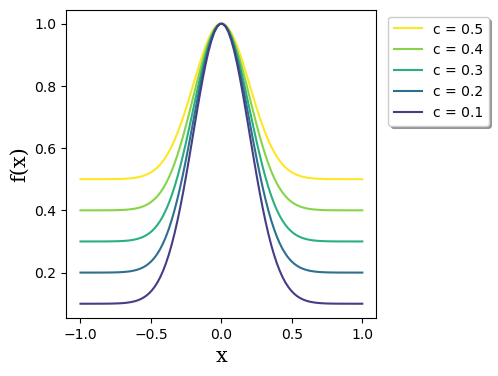

In [25]:
fig9 = plt.figure(figsize = (4,4))

#title = r'$f(x) = (1 + \frac{2 * \pi * x}{L}) * \frac{dt}{2} $'
#title = r'$f(x) = c + (1-c) * exp(\frac{(x -\mu)^2}{2 * \sigma^2}) $'
suptitle = "margin"
xlab = 'x'
ylab = 'f(x)'
plt.xlabel(xlab, fontsize=15, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=15, fontfamily = 'serif')
viridis = cm.get_cmap('viridis', 12)
#plt.title(title)
#plt.suptitle(suptitle)

x_values = np.linspace(-2*L/2, 2*L/2, 100)
for mu, sig, const in [(0, 0.2, 0.5), (0, 0.2, 0.4), (0, 0.2, 0.3), (0, 0.2, 0.2), (0, 0.2, 0.1)]:
    viridis_value = const  / 0.5
    plt.plot(x_values, gaussian(x_values, mu, sig, const), label = f"c = {const}",  color=viridis(viridis_value))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig9.savefig("gaussian_gf_vary_margin_large.pdf", bbox_inches='tight') 

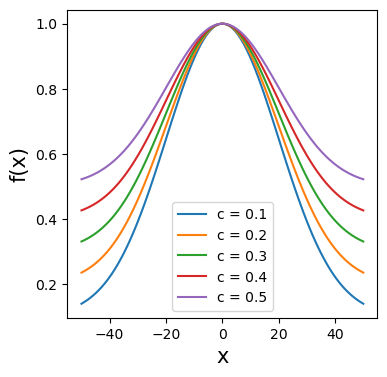

In [26]:
fig = plt.figure(figsize = (4,4))

#title = r'$f(x) = c + (1-c) * exp(\frac{(x -\mu)^2}{2 * \sigma^2}) $'
#suptitle = "margin"
xlab = 'x'
ylab = 'f(x)'
plt.xlabel(xlab, fontsize=15)
plt.ylabel(ylab, fontsize=15)
viridis = cm.get_cmap('viridis', 12)

x_values = np.linspace(-50, 50, 100)
for mu, sig, const in [(0, 20, 0.1), (0, 20, 0.2), (0, 20, 0.3), (0, 20, 0.4), (0, 20, 0.5)]:
    plt.plot(x_values, gaussian(x_values, mu, sig, const), label = f"c = {const}")
plt.legend()
plt.show()

### dy/dx

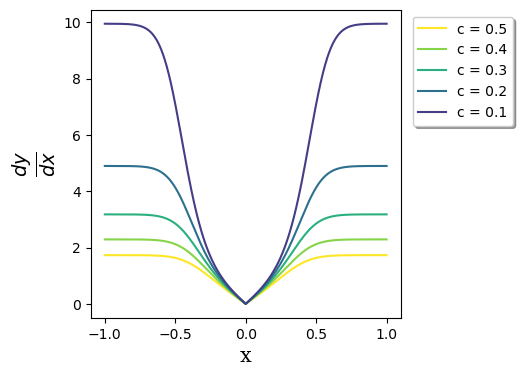

In [27]:
x_values = np.linspace(-2*L/2, 2*L/2, NB_POINTS)
fig10 = plt.figure(figsize = (4,4))
#plt.title(r'$\frac{dy}{dx}$', fontsize = 20)

x_lab = 'x'
y_lab = r'$\frac{dy}{dx}$'

plt.xlabel(x_lab, fontsize = 15, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 20, fontfamily='serif')

viridis = cm.get_cmap('viridis', 12)

for mu, sig, const in [(0, 0.2, 0.5), (0, 0.2, 0.4), (0, 0.2, 0.3), (0, 0.2, 0.2), (0, 0.2, 0.1)]:
    viridis_value = const  / 0.5
    y_prime = np.sqrt((T / gaussian(x_values, mu, sig, const))**2 - 1)
    plt.plot(x_values, y_prime, label = f"c = {const}", color=viridis(viridis_value))

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig10.savefig("gaussian_dydx_c.pdf", bbox_inches='tight') 

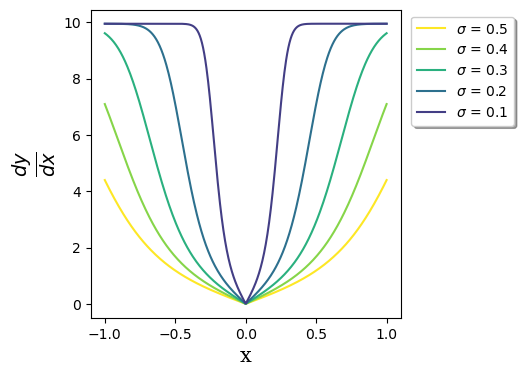

In [28]:
x_values = np.linspace(-2*L/2, 2*L/2, NB_POINTS)
fig11 = plt.figure(figsize = (4,4))
#plt.title(r'$\frac{dy}{dx}$', fontsize = 20)

x_lab = 'x'
y_lab = r'$\frac{dy}{dx}$'

plt.xlabel(x_lab, fontsize = 15, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 20, fontfamily='serif')

viridis = cm.get_cmap('viridis', 12)

for mu, sig, const in [(0, 0.5, 0.1), (0, 0.4, 0.1), (0, 0.3, 0.1), (0, 0.2, 0.1), (0, 0.1, 0.1)]:
    viridis_value = sig / 0.5
    y_prime = np.sqrt((T / gaussian(x_values, mu, sig, const))**2 - 1)
    plt.plot(x_values, y_prime, label = f"$\sigma$ = {sig}", color=viridis(viridis_value))

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig11.savefig("gaussian_dydx_sig.pdf", bbox_inches='tight') 

### stationary shape

In [29]:
def deriv_integ_border_gaussian(x_vec, mu, sig, const):
        
    normal_speed = gaussian(x_vec, mu, sig, const) # to avaid divisions by zero
    deriv_slope = np.sqrt((T / normal_speed )**2 - 1)
    finger = np.zeros(deriv_slope.shape)
    
    finger[:int(len(finger) / 2)] = np.cumsum(deriv_slope[:int(len(finger)/2)])
    finger[int(len(finger) / 2):] = np.flip(np.cumsum(np.flip(deriv_slope[int(len(finger)/2):])))

    return(finger)

In [30]:
def deriv_integ_middle_gaussian(x_vec, mu, sig, const):
        
    normal_speed = gaussian(x_vec, mu, sig, const) # to avaid divisions by zero
    deriv_slope = np.sqrt((T / normal_speed )**2 - 1)
    finger = np.zeros(deriv_slope.shape)
    
    if (len(finger) % 2) == 0:
        finger[:int(len(finger) / 2) - 1] = np.flip(np.cumsum(np.flip(deriv_slope[:int(len(finger)/2 -1)])))
        finger[int(len(finger) / 2):] = np.cumsum(deriv_slope[int(len(finger)/2):])
    else:
        finger[:int(len(finger) / 2)] = np.flip(np.cumsum(np.flip(deriv_slope[:int(len(finger)/2)])))
        finger[int(len(finger) / 2):] = np.cumsum(deriv_slope[int(len(finger)/2):])

    return(finger)

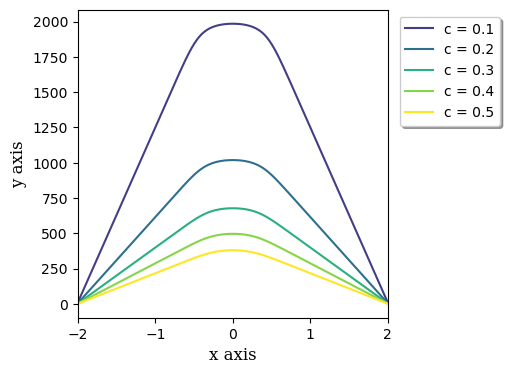

In [31]:
fig12 = plt.figure(figsize = (4,4))
init_large = np.linspace(-2, 2, NB_POINTS)
plt.xlim([-2, 2])

x_lab = 'x axis'
y_lab = 'y axis'

plt.xlabel(x_lab, fontsize = 12, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 12, fontfamily='serif')

#plt.title('Stationary shape')
#plt.ylim([-1, 100])
mu = 0
sig = 0.2

viridis = cm.get_cmap('viridis', 12)

for c in np.arange(0.1, 0.6, 0.1):
    viridis_value = c / 0.5
    y = deriv_integ_border_gaussian(init_large, mu, sig, c)
    plt.plot(init_large, y, label = f"c = {c:.1f}", color=viridis(viridis_value))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig12.savefig("gaussian_stationary_c_large.pdf", bbox_inches='tight') 

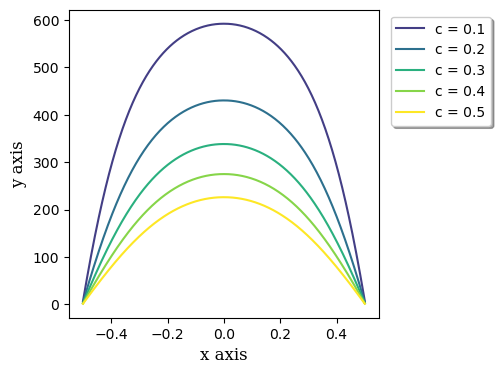

In [32]:
fig13 = plt.figure(figsize = (4,4))

x_lab = 'x axis'
y_lab = 'y axis'

plt.xlabel(x_lab, fontsize = 12, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 12, fontfamily='serif')

mu = 0
sig = 0.2
viridis = cm.get_cmap('viridis', 12)
for c in np.arange(0.1, 0.6, 0.1):
    viridis_value = c / 0.5
    y = deriv_integ_border_gaussian(init_x, mu, sig, c)
    plt.plot(init_x, y, label = f"c = {c:.1f}", color=viridis(viridis_value))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig13.savefig("gaussian_stationary_c_close.pdf", bbox_inches='tight') 

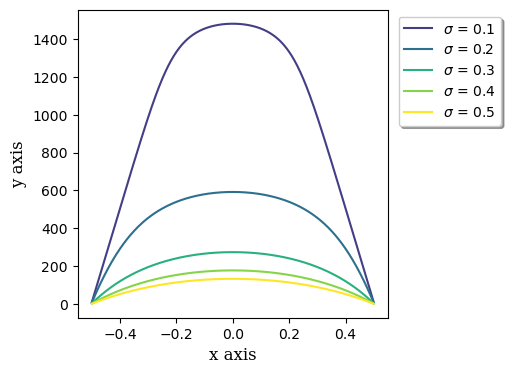

In [33]:
fig14 = plt.figure(figsize = (4,4))

x_lab = 'x axis'
y_lab = 'y axis'

plt.xlabel(x_lab, fontsize = 12, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 12, fontfamily='serif')

mu = 0
c = 0.1
viridis = cm.get_cmap('viridis', 12)
for sig in np.arange(0.1, 0.6, 0.1):
    viridis_value = sig / 0.5
    y = deriv_integ_border_gaussian(init_x, mu, sig, c)
    plt.plot(init_x, y, label = f"$\sigma$ = {sig:.1f}", color=viridis(viridis_value))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig14.savefig("gaussian_stationary_sig_close.pdf", bbox_inches='tight') 

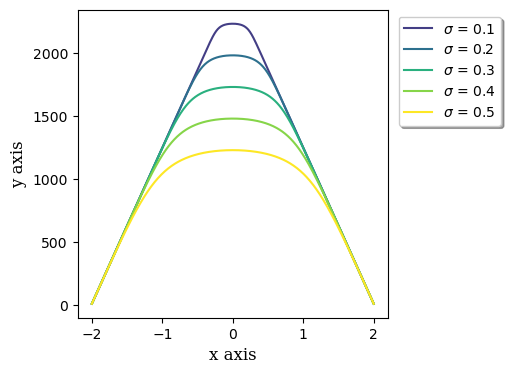

In [34]:
fig15 = plt.figure(figsize = (4,4))

x_lab = 'x axis'
y_lab = 'y axis'

plt.xlabel(x_lab, fontsize = 12, fontfamily='serif')
plt.ylabel(y_lab, fontsize = 12, fontfamily='serif')

mu = 0
c = 0.1
viridis = cm.get_cmap('viridis', 12)
for sig in np.arange(0.1, 0.6, 0.1):
    viridis_value = sig / 0.5
    y = deriv_integ_border_gaussian(init_large, mu, sig, c)
    plt.plot(init_large, y, label = f"$\sigma$ = {sig:.1f}", color=viridis(viridis_value))
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)
plt.show()
#fig15.savefig("gaussian_stationary_sig_large.pdf", bbox_inches='tight') 

recap sigma (large base)

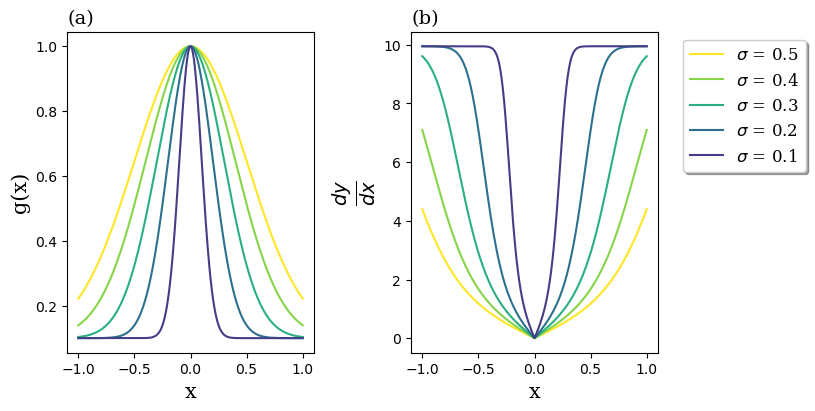

In [35]:
fig_comp = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig_comp.add_gridspec(1, 2, wspace = 0.04, hspace = 0.5, bottom = 0.2)


#x_values = np.linspace(-2*L/2, 2*L/2, 100)

# Plot 1
ax1 = fig_comp.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = 'g(x)'

ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
viridis = cm.get_cmap('viridis', 12)

#x_values = np.linspace(-2*L/2, 2*L/2, 100)
for mu, sig, const in [(0, 0.5, 0.1), (0, 0.4, 0.1), (0, 0.3, 0.1), (0, 0.2, 0.1), (0, 0.1, 0.1)]:
    viridis_value = sig  / 0.5
    plt.plot(x_values, gaussian(x_values, mu, sig, const), label = f"$\sigma$ = {sig}", color=viridis(viridis_value))


# Plot 2
ax2 = fig_comp.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = r'$\frac{dy}{dx}$'

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 20, fontfamily='serif')

for mu, sig, const in [(0, 0.5, 0.1), (0, 0.4, 0.1), (0, 0.3, 0.1), (0, 0.2, 0.1), (0, 0.1, 0.1)]:
    viridis_value = sig / 0.5
    y_prime = np.sqrt((T / gaussian(x_values, mu, sig, const))**2 - 1)
    ax2.plot(x_values, y_prime, label = f"$\sigma$ = {sig}", color=viridis(viridis_value))


# Legend

ax2.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})



plt.show()
fig_comp.savefig("vary_sigma_f_dy.pdf", bbox_inches='tight') 

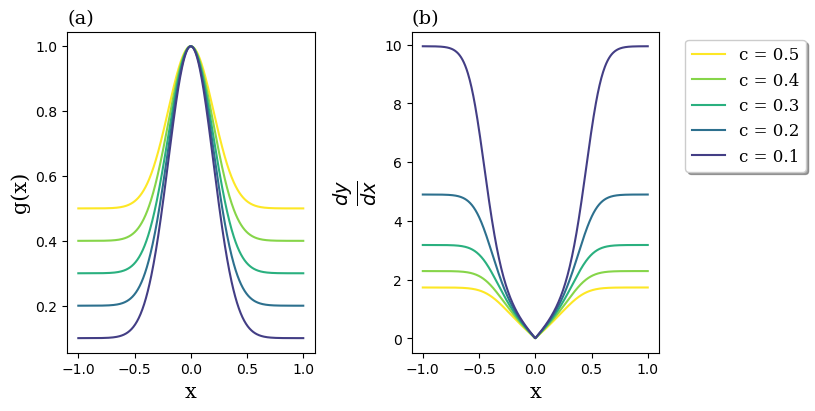

In [36]:
fig_comp_c = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig_comp_c.add_gridspec(1, 2, wspace = 0.04, hspace = 0.5, bottom = 0.2)

# Plot 1
ax1 = fig_comp_c.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = 'g(x)'

ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
viridis = cm.get_cmap('viridis', 12)

init_large = np.linspace(-1, 1, NB_POINTS)
for mu, sig, const in [(0, 0.2, 0.5), (0, 0.2, 0.4), (0, 0.2, 0.3), (0, 0.2, 0.2), (0, 0.2, 0.1)]:
    viridis_value = const  / 0.5
    ax1.plot(init_large, gaussian(init_large, mu, sig, const), label = f"c = {const}",  color=viridis(viridis_value))



# Plot 2
ax2 = fig_comp_c.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = r'$\frac{dy}{dx}$'

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 20, fontfamily='serif')

for mu, sig, const in [(0, 0.2, 0.5), (0, 0.2, 0.4), (0, 0.2, 0.3), (0, 0.2, 0.2), (0, 0.2, 0.1)]:
    viridis_value = const  / 0.5
    y_prime = np.sqrt((T / gaussian(init_large, mu, sig, const))**2 - 1)
    ax2.plot(init_large, y_prime, label = f"c = {const}", color=viridis(viridis_value))


# Legend

ax2.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})



plt.show()
fig_comp_c.savefig("vary_c_f_dy.pdf", bbox_inches='tight') 

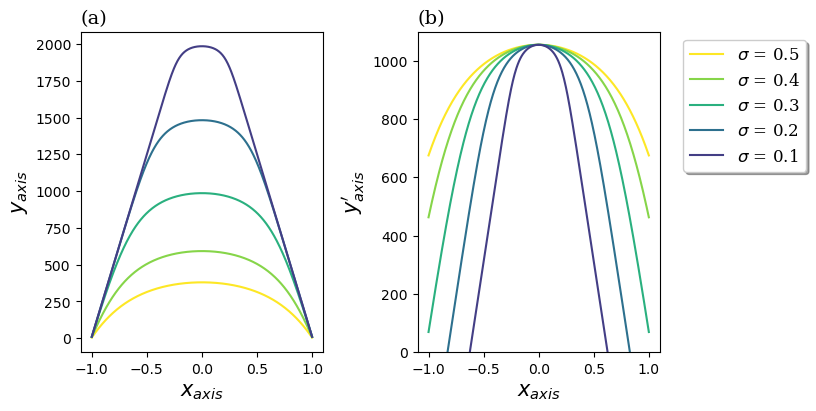

In [37]:
fig_stat_sig = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig_stat_sig.add_gridspec(1, 2, wspace = 0.04, hspace = 0.5, bottom = 0.2)

# Plot 1
ax1 = fig_stat_sig.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)


x_lab = r'$x_{axis}$'
y_lab = r'$y_{axis}$'


ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')

viridis = cm.get_cmap('viridis', 12)

init_large = np.linspace(-1, 1, NB_POINTS)

mu = 0
c = 0.1
viridis = cm.get_cmap('viridis', 12)
for sig in np.flip(np.arange(0.1, 0.6, 0.1)):
    viridis_value = sig / 0.5
    y = deriv_integ_border_gaussian(init_large, mu, sig, c)
    ax1.plot(init_large, y, label = f"$\sigma$ = {sig:.1f}", color=viridis(viridis_value))




# Plot 2
ax2 = fig_stat_sig.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)

#ax2.set_yticks([])
#ax2.set_xticks([])
ax2.set_ylim([0, 1100])

for sig in np.flip(np.arange(0.1, 0.6, 0.1)):
    viridis_value = sig / 0.5
    y = deriv_integ_middle_gaussian(init_large, mu, sig, c)
    ax2.plot(init_large, -y + 1055, label = f"$\sigma$ = {sig:.1f}", color=viridis(viridis_value))
    
x_lab = r'$x_{axis}$'
y_lab = r'$y^{\prime}_{axis}$'


# Legend

ax2.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')

plt.show()
fig_stat_sig.savefig("vary_sig_stat.pdf", bbox_inches='tight') 

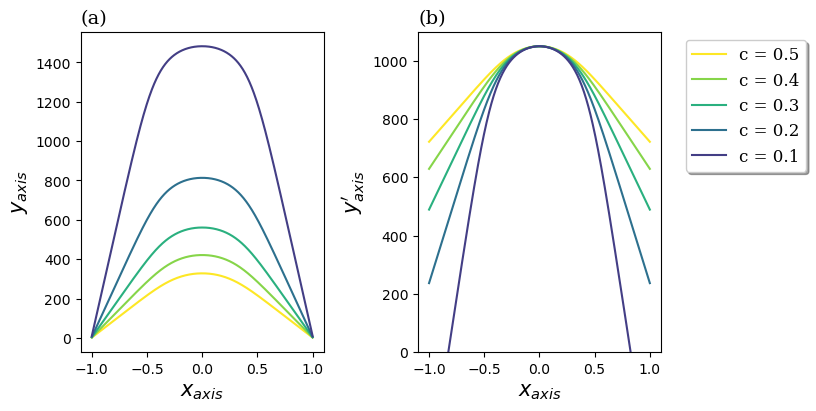

In [38]:
fig_stat_c = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig_stat_c.add_gridspec(1, 2, wspace = 0.04, hspace = 0.5, bottom = 0.2)

# Plot 1
ax1 = fig_stat_c.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)


x_lab = r'$x_{axis}$'
y_lab = r'$y_{axis}$'


ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')

viridis = cm.get_cmap('viridis', 12)

init_large = np.linspace(-1, 1, NB_POINTS)

mu = 0
sig = 0.2
viridis = cm.get_cmap('viridis', 12)
for c in np.flip(np.arange(0.1, 0.6, 0.1)):
    viridis_value = c / 0.5
    y = deriv_integ_border_gaussian(init_large, mu, sig, c)
    ax1.plot(init_large, y, label = f"c = {c:.1f}", color=viridis(viridis_value))





# Plot 2
ax2 = fig_stat_c.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)

#ax2.set_yticks([])
#ax2.set_xticks([])
ax2.set_ylim([0, 1100])

for c in np.flip(np.arange(0.1, 0.6, 0.1)):
    viridis_value = c / 0.5
    y = deriv_integ_middle_gaussian(init_large, mu, sig, c)
    ax2.plot(init_large, (- y + 1050), label = f"c = {c:.1f}", color=viridis(viridis_value))

x_lab = r'$x_{axis}$'
y_lab = r'$y^{\prime}_{axis}$'

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
# Legend

ax2.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})



plt.show()
fig_stat_c.savefig("vary_c_stat.pdf", bbox_inches='tight') 

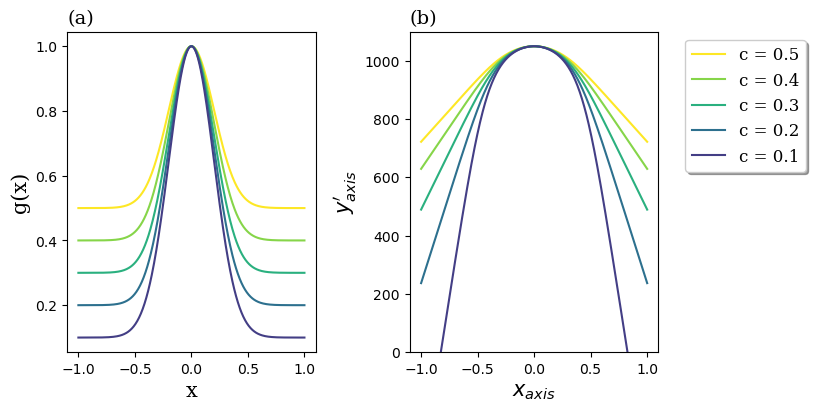

In [39]:
fig_stat_c_final = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig_stat_c_final.add_gridspec(1, 2, wspace = 0.04, hspace = 0.5, bottom = 0.2)

# Plot 1
ax1 = fig_stat_c_final.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = 'g(x)'

ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
viridis = cm.get_cmap('viridis', 12)

init_large = np.linspace(-1, 1, NB_POINTS)
for mu, sig, const in [(0, 0.2, 0.5), (0, 0.2, 0.4), (0, 0.2, 0.3), (0, 0.2, 0.2), (0, 0.2, 0.1)]:
    viridis_value = const  / 0.5
    ax1.plot(init_large, gaussian(init_large, mu, sig, const), label = f"c = {const}",  color=viridis(viridis_value))





# Plot 2
ax2 = fig_stat_c_final.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)

#ax2.set_yticks([])
#ax2.set_xticks([])
ax2.set_ylim([0, 1100])

for c in np.flip(np.arange(0.1, 0.6, 0.1)):
    viridis_value = c / 0.5
    y = deriv_integ_middle_gaussian(init_large, mu, sig, c)
    ax2.plot(init_large, (- y + 1050), label = f"c = {c:.1f}", color=viridis(viridis_value))

x_lab = r'$x_{axis}$'
y_lab = r'$y^{\prime}_{axis}$'

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
# Legend

ax2.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})



plt.show()
fig_stat_c_final.savefig("vary_c_final.pdf", bbox_inches='tight') 

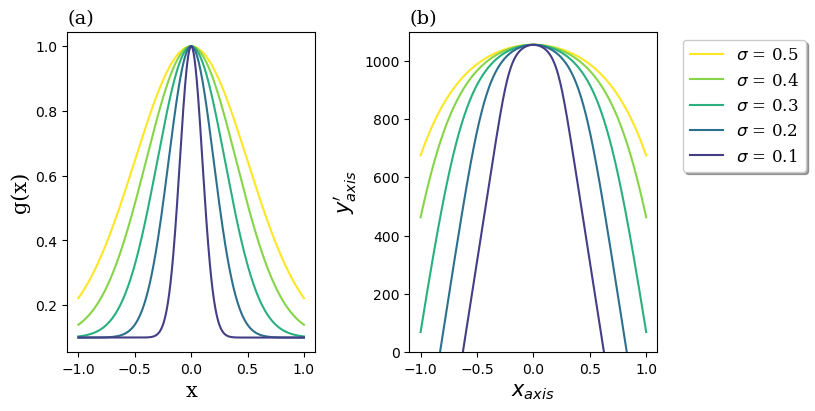

In [40]:
fig_stat_sigma_final = plt.figure(constrained_layout=True, figsize = (8,4))
gs = fig_stat_sigma_final.add_gridspec(1, 2, wspace = 0.04, hspace = 0.5, bottom = 0.2)

# Plot 1
ax1 = fig_stat_sigma_final.add_subplot(gs[:, 0])
ax1.set_title("(a)", fontfamily='serif', loc='left', fontsize= 14)

x_lab = 'x'
y_lab = 'g(x)'

ax1.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax1.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')
viridis = cm.get_cmap('viridis', 12)

#x_values = np.linspace(-2*L/2, 2*L/2, 100)
for mu, sig, const in [(0, 0.5, 0.1), (0, 0.4, 0.1), (0, 0.3, 0.1), (0, 0.2, 0.1), (0, 0.1, 0.1)]:
    viridis_value = sig  / 0.5
    plt.plot(x_values, gaussian(x_values, mu, sig, const), label = f"$\sigma$ = {sig}", color=viridis(viridis_value))






# Plot 2
ax2 = fig_stat_sigma_final.add_subplot(gs[:, 1])
ax2.set_title("(b)", fontfamily='serif', loc='left', fontsize= 14)

#ax2.set_yticks([])
#ax2.set_xticks([])
ax2.set_ylim([0, 1100])

for sig in np.flip(np.arange(0.1, 0.6, 0.1)):
    viridis_value = sig / 0.5
    y = deriv_integ_middle_gaussian(init_large, mu, sig, c)
    ax2.plot(init_large, -y + 1055, label = f"$\sigma$ = {sig:.1f}", color=viridis(viridis_value))
    
x_lab = r'$x_{axis}$'
y_lab = r'$y^{\prime}_{axis}$'

ax2.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})

x_lab = r'$x_{axis}$'
y_lab = r'$y^{\prime}_{axis}$'

ax2.set_xlabel(x_lab, fontsize = 15, fontfamily='serif')
ax2.set_ylabel(y_lab, fontsize = 15, fontfamily='serif')

plt.show()
fig_stat_sigma_final.savefig("vary_sigma_final.pdf", bbox_inches='tight') 

iterate

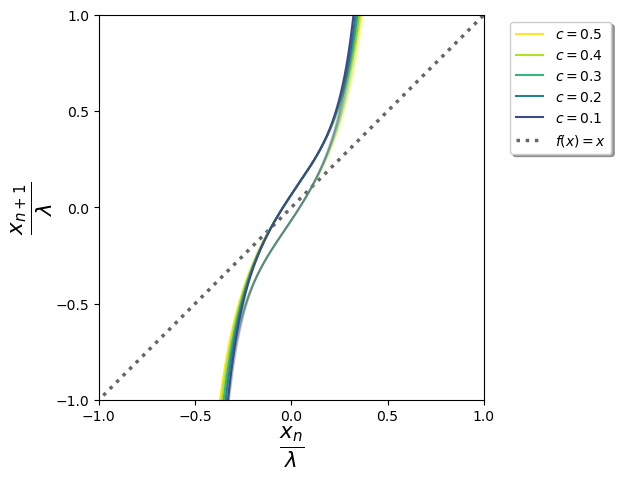

In [41]:
fig16 = plt.figure(figsize = (5,5))
plt.gca().set_aspect('equal', adjustable='box')

# initial set-up: one vein at x = 0
nb_division = 30
dist_points = init_x[1:] - init_x[:-1]  # init_x are the initial x position of the front
dist_points = dist_points.mean() # suppose the distance between points is a constant
level = 30
viridis = cm.get_cmap('viridis', 10)

mu = 0
sig = 0.2
for c in np.flip(np.arange(0.1, 0.6, 0.1)):

    # compute dy/dx
    slope_vec = - np.sign(init_x) * slope_gaussian(init_x, mu, sig, c)
    
    # compute sin(theta) and cos(theta)
    sin_theta = slope_vec * 1 / np.sqrt(1 + slope_vec**2)
    cos_theta = 1 / np.sqrt(1 + slope_vec**2)

    # compute d2y/d2x
    der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dist_points   #border condition, the size of der_slop_vec is slope_vec - 1

    # compute dtheta/ds
    dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

    # compute T
    T_0 = 1 / (2 * dtheta_ds)

    # compute x1p et x1m
    x1p_gaussian = init_x[1:] + T_0 * sin_theta[1:] + cos_theta[1:] * (lbda / 3)  # why don't we do a while loop on x position ?
    x1m_gaussian = init_x[1:] + T_0 * sin_theta[1:] - cos_theta[1:] * (lbda / 3)
    
    viridis_value = c / 0.5   
    plt.plot(init_x[1:], x1p_gaussian, label = f"$c = {c:.1f}$", color=viridis(viridis_value), zorder = 1)
    plt.plot(init_x[1:], x1m_gaussian, color=viridis(viridis_value), zorder = 1, alpha = 0.4)

    
    
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xticks(np.arange(-1,1.1,0.5))
plt.yticks(np.arange(-1,1.1,0.5))
plt.gca().set_aspect('equal', adjustable='box')


xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')    
    
x = np.linspace(-80, 80, NB_POINTS)
#plt.plot(init_x[1:], x1p, color = 'red', zorder = 2, alpha = 0.4, label = 'finger')
#plt.plot(init_x[1:], x1m, color = 'red', zorder = 2, alpha = 0.4)

plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 0)

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)

fig16.savefig("gaussian_iterate_c.pdf", bbox_inches='tight') 

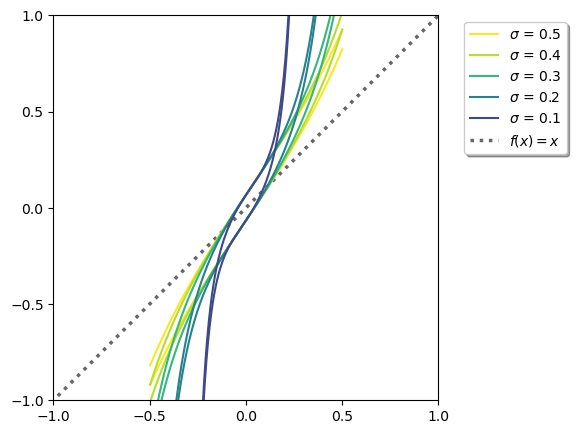

In [42]:
%matplotlib inline

fig17 = plt.figure(figsize = (5,5))
plt.gca().set_aspect('equal', adjustable='box')

# initial set-up: one vein at x = 0
nb_division = 30
lbda = 0.2
dist_points = init_x[1:] - init_x[:-1]  # init_x are the initial x position of the front
dist_points = dist_points.mean() # suppose the distance between points is a constant
level = 30
viridis = cm.get_cmap('viridis', 10)

mu = 0
c = 0.4
for sig in np.flip(np.arange(0.1, 0.6, 0.1)):

    # compute dy/dx
    slope_vec = - np.sign(init_x) * slope_gaussian(init_x, mu, sig, c)
    
    # compute sin(theta) and cos(theta)
    sin_theta = slope_vec * 1 / np.sqrt(1 + slope_vec**2)
    cos_theta = 1 / np.sqrt(1 + slope_vec**2)

    # compute d2y/d2x
    der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dist_points   #border condition, the size of der_slop_vec is slope_vec - 1

    # compute dtheta/ds
    dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

    # compute T
    T_0 = 1 / (2 * dtheta_ds)

    # compute x1p et x1m
    x1p_gaussian = init_x[1:] + T_0 * sin_theta[1:] + cos_theta[1:] * (lbda / 3)  # why don't we do a while loop on x position ?
    x1m_gaussian = init_x[1:] + T_0 * sin_theta[1:] - cos_theta[1:] * (lbda / 3)
    
    viridis_value = sig / 0.5   
    plt.plot(init_x[1:], x1p_gaussian, label = f"$\sigma$ = {sig:.1f}", color=viridis(viridis_value))
    plt.plot(init_x[1:], x1m_gaussian, color=viridis(viridis_value))

    
    
    
    
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xticks(np.arange(-1,1.1,0.5))
plt.yticks(np.arange(-1,1.1,0.5))
plt.gca().set_aspect('equal', adjustable='box')

x = np.linspace(-80, 80, NB_POINTS)
#plt.plot(init_x[1:], x1p, color = 'red', label = 'finger')
#plt.plot(init_x[1:], x1m, color = 'red')

plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 0)

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True)

fig17.savefig("gaussian_iterate_sig.pdf", bbox_inches='tight') 

## Compute the slope of the iterate's central part

In [43]:
ind = np.where((init_x[1:] < 0.05) & (init_x[1:] > - 0.05))

X = init_x[ind] - init_x[ind].mean()
Y = x1p[ind] - x1p[ind].mean()

slope_iterate = (X.dot(Y)) / (X.dot(X))
print(slope_iterate)

1.5062600776909343


## Take into account the front's curvature

### curvature function

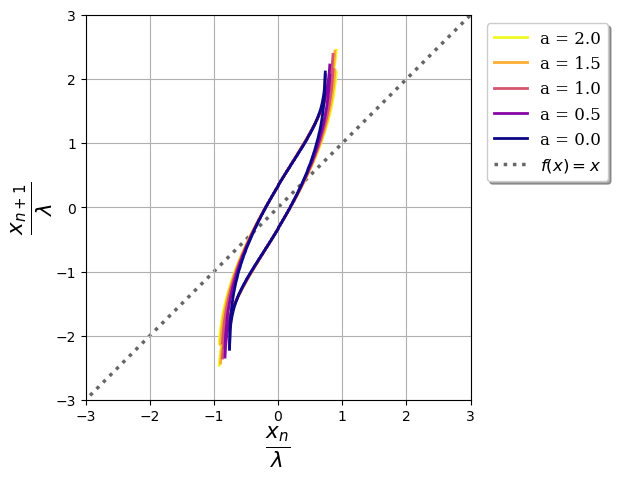

In [44]:
   
fig_varya = plt.figure(figsize = (5,5))




# initial set-up: one vein at x = 0
lbda = 0.2

viridis = cm.get_cmap('plasma', 12)

for a_local in np.flip(np.arange(0.0000001,2.5,0.5)):
    
    viridis_value = a_local  / 2
    
    # 1) calculer dy/dx
    slope_vec = slope(init_x, T, a_local)   # slope_vec = np.sign(init_x) * slope(init_x, T, a)
    #print(slope_vec)

    # 2) calculer d2y/d2x
    dx = init_x[1:] - init_x[:-1]
    der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

    # 3) calculer dtheta/ds
    dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

    # 4) calculer dl 
    dy = slope_vec[1:] * dx
    dl = np.sqrt(dx**2 + dy**2)


    # 5) calculer dn 
    dn  = dl / abs(slope_vec[1:])   #abs is needed if dy dx has the right signs

    # 6) intégrer dl * dtheta/ds sur x
    dn_dtheta_ds = dn * abs(dtheta_ds)

    x_final_list = []
    x1p_list = []
    x1m_list = []
    indice_list = []
    xi_list = []
    

    for i in range(len(dn_dtheta_ds)):
        if init_x[i] >= 0:
            cum_sum = np.cumsum(dn_dtheta_ds[i:])
            sup = np.where(cum_sum > 1/2)[0]
            if len(sup) > 0:
                sup = sup[0]
                indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
                #print(i, indice, sup)
                indice_list.append(indice)
                x_final = init_x[indice] 
                x_final_list.append(x_final)
                slope_x_final = np.sign(x_final) * slope(x_final, T, a_local)

                cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

                # compute x1p et x1m
                x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
                x1m = x_final - cos_theta_final * (lbda / 3)    

                x1p_list.append(x1p)
                x1m_list.append(x1m)

                # save x_i
                x_i = init_x[i]
                xi_list.append(x_i)

        if init_x[i] <= 0:
            cum_sum = np.cumsum(np.flip(dn_dtheta_ds[:i]))
            sup = np.where(cum_sum > 1/2)[0]
            if len(sup) > 0:
                sup = sup[0]
                indice = i - sup - 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
                #print(i, indice, sup)
                indice_list.append(indice)
                x_final = init_x[indice] 
                x_final_list.append(x_final)
                slope_x_final = np.sign(x_final) * slope(x_final, T, a_local)

                cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

                # compute x1p et x1m
                x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
                x1m = x_final - cos_theta_final * (lbda / 3)    

                x1p_list.append(x1p)
                x1m_list.append(x1m)

                # save x_i
                x_i = init_x[i]
                xi_list.append(x_i)

    # 7) create coordinates array and delete doubles (we find ourselves several times at the same index)


    coordinates = np.array([(xi_list), (x1p_list), (x1m_list)])
    coordinates = np.unique(coordinates, axis=1)
    plt.plot(coordinates[0,:] / lbda, coordinates[1,:] / lbda, linewidth = 2, color=viridis(viridis_value), label = f"a = {a_local:.1f}")
    plt.plot(coordinates[0,:] / lbda, coordinates[2,:] / lbda, linewidth = 2, color=viridis(viridis_value))
    
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid()


plt.xticks(np.arange(-3,3.1,1))
plt.yticks(np.arange(-3,3.1,1))
plt.gca().set_aspect('equal', adjustable='box')


xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')

x = np.linspace(-80, 80, NB_POINTS)
    
plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 0)

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})


fig_varya.savefig("vary_a.pdf", bbox_inches='tight') 

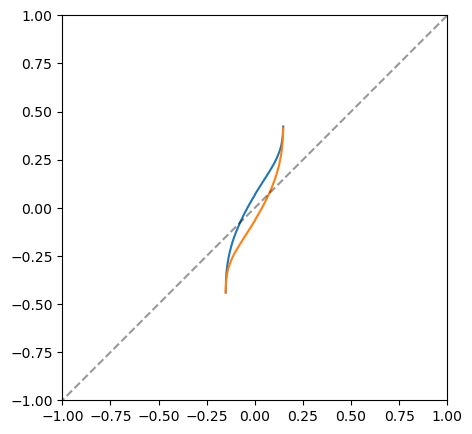

In [45]:


fig = plt.figure(figsize = (5,5))
plt.gca().set_aspect('equal', adjustable='box')


# initial set-up: one vein at x = 0
lbda = 0.2

a = 0.000001

    
# 1) calculer dy/dx
slope_vec = slope(init_x, T, a)   # slope_vec = np.sign(init_x) * slope(init_x, T, a)
#print(slope_vec)

# 2) calculer d2y/d2x
dx = init_x[1:] - init_x[:-1]
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

# 3) calculer dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# 4) calculer dl 
dy = slope_vec[1:] * dx
dl = np.sqrt(dx**2 + dy**2)


# 5) calculer dn 
dn  = dl / abs(slope_vec[1:])   #abs is needed if dy dx has the right signs

# 6) intégrer dl * dtheta/ds sur x
dn_dtheta_ds = dn * abs(dtheta_ds)

x_final_list = []
x1p_list = []
x1m_list = []
indice_list = []
xi_list = []

for i in range(len(dn_dtheta_ds)):
    if init_x[i] >= 0:
        cum_sum = np.cumsum(dn_dtheta_ds[i:])
        sup = np.where(cum_sum > 1/2)[0]
        if len(sup) > 0:
            sup = sup[0]
            indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
            #print(i, indice, sup)
            indice_list.append(indice)
            x_final = init_x[indice] 
            x_final_list.append(x_final)
            slope_x_final = np.sign(x_final) * slope(x_final, T, a)

            cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

            # compute x1p et x1m
            x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
            x1m = x_final - cos_theta_final * (lbda / 3)    
        
            x1p_list.append(x1p)
            x1m_list.append(x1m)
        
            # save x_i
            x_i = init_x[i]
            xi_list.append(x_i)
            
    if init_x[i] <= 0:
        cum_sum = np.cumsum(np.flip(dn_dtheta_ds[:i]))
        sup = np.where(cum_sum > 1/2)[0]
        if len(sup) > 0:
            sup = sup[0]
            indice = i - sup - 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
            #print(i, indice, sup)
            indice_list.append(indice)
            x_final = init_x[indice] 
            x_final_list.append(x_final)
            slope_x_final = np.sign(x_final) * slope(x_final, T, a)

            cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

            # compute x1p et x1m
            x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
            x1m = x_final - cos_theta_final * (lbda / 3)    
        
            x1p_list.append(x1p)
            x1m_list.append(x1m)
        
            # save x_i
            x_i = init_x[i]
            xi_list.append(x_i)
            
# 7) create coordinates array and delete doubles (we find ourselves several times at the same index)


coordinates = np.array([(xi_list), (x1p_list), (x1m_list)])
coordinates = np.unique(coordinates, axis=1)

plt.xlim([-1, 1])
plt.ylim([-1, 1])
x = np.linspace(-80, 80, NB_POINTS)
plt.plot(coordinates[0,:], coordinates[1,:])
plt.plot(coordinates[0,:], coordinates[2,:])
plt.plot(x,x, color = 'black', linestyle = '--', alpha = 0.4)



1.6955279288359018
1.5062600949329805


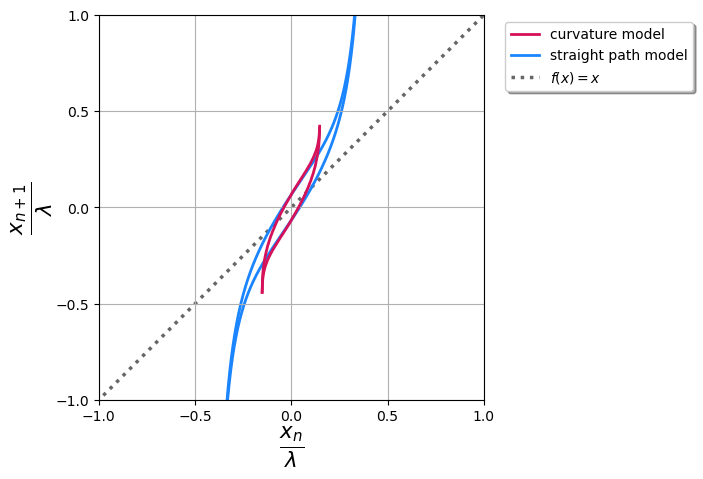

In [46]:
%matplotlib inline

fig_c = plt.figure(figsize = (5,5))
plt.gca().set_aspect('equal', adjustable='box')

plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.gca().set_aspect('equal', adjustable='box')


xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')


#### MODEL CURVATURE

# initial set-up: one vein at x = 0
lbda = 0.2

# 1) calculer dy/dx
slope_vec = np.sign(init_x) * slope(init_x, T, a)

# 2) calculer d2y/d2x
dx = init_x[1:] - init_x[:-1]
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

# 3) calculer dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# 4) calculer dl 
dy = slope_vec[1:] * dx
dl = np.sqrt(dx**2 + dy**2)

# 5) calculer dn 

dn  = dl / abs(slope_vec[1:])



# 6) intégrer dl * dtheta/ds sur x
dn_dtheta_ds = dn * dtheta_ds 
dn_dtheta_ds = np.flip(dn_dtheta_ds)

x_final_list = []
x1p_list = []
x1m_list = []
indice_list = []


for i in range(len(dn_dtheta_ds)):
    cum_sum = np.cumsum(dn_dtheta_ds[i:])
    sup = np.where(cum_sum > 1/2)[0]
    if len(sup) > 0:
        sup = sup[0]
        indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
        indice = len(init_x) - indice
        #print(i, indice, sup)
        indice_list.append(indice)
        x_final = init_x[indice] 
        x_final_list.append(x_final)
    
        slope_x_final = np.sign(x_final) * slope(x_final, T, a)

        cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

# compute x1p et x1m
        x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
        x1m = x_final - cos_theta_final * (lbda / 3)    
        
        x1p_list.append(x1p)
        x1m_list.append(x1m)
        
# 7) create coordinates array and delete doubles (we find ourselves several times at the same index)
coordinates_flip = np.array([(x_final_list), (x1p_list), (x1m_list)])
coordinates_flip = np.unique(coordinates, axis=1)

# WARNING FLIP ICI


plt.plot(coordinates_flip[0,:], coordinates_flip[1,:], color = '#D41159', label = 'curvature model', linewidth = 2, zorder = 2)
plt.plot(coordinates_flip[0,:], coordinates_flip[2,:], color = '#D41159', linewidth = 2, zorder = 2)

## add slope value

ind = np.where((coordinates_flip[0,:] < 0.05) & (coordinates_flip[0,:] > - 0.05))

X = coordinates_flip[0,ind] - coordinates_flip[0,ind].mean()
Y = coordinates_flip[1,ind] - coordinates_flip[1,ind].mean()

X = np.squeeze(np.asarray(X))

Y = np.squeeze(np.asarray(Y))

slope_iterate = (X.dot(Y)) / (X.dot(X))
print(slope_iterate)


#### PREVIOUS MODEL

# initial set-up: one vein at x = 0
x0 = 0
nb_division = 30
dist_points = init_x[1:] - init_x[:-1]  # init_x are the initial x position of the front
dist_points = dist_points.mean() # suppose the distance between points is a constant
level = 30

# compute dy/dx
slope_vec = - np.sign(init_x) * slope(init_x, T, a)
    
# compute sin(theta) and cos(theta)
sin_theta = slope_vec * 1 / np.sqrt(1 + slope_vec**2)
cos_theta = 1 / np.sqrt(1 + slope_vec**2)

# compute d2y/d2x
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dist_points   #border condition, the size of der_slop_vec is slope_vec - 1

# compute dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# compute T
T_0 = 1 / (2 * dtheta_ds)

# compute x1p et x1m
x1p = init_x[1:] + T_0 * sin_theta[1:] + cos_theta[1:] * (lbda / 3)  # why don't we do a while loop on x position ?
x1m = init_x[1:] + T_0 * sin_theta[1:] - cos_theta[1:] * (lbda / 3)

# the third part is too small compared to the second  to make any difference :/




plt.plot(init_x[1:], x1p, label = 'straight path model', color = '#1A85FF', linewidth = 2, zorder = 1)
plt.plot(init_x[1:], x1m, color = '#1A85FF', linewidth = 2, zorder = 1)



### FINISH
x = np.linspace(-80, 80, NB_POINTS)
plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 0)

plt.xticks(np.arange(-1,1.1,0.5))
plt.yticks(np.arange(-1,1.1,0.5))

plt.grid(True, zorder = 0)

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          ncol=1, fancybox=True, shadow=True)

## add slope value

ind = np.where((init_x[1:] < 0.05) & (init_x[1:] > - 0.05))

X = init_x[ind] - init_x[ind].mean()
Y = x1p[ind] - x1p[ind].mean()

slope_iterate = (X.dot(Y)) / (X.dot(X))
print(slope_iterate)



# save

plt.show()
fig_c.savefig("iterate_straight_curvature.pdf", bbox_inches='tight') 

1.6955279288359018
1.5062600949329805


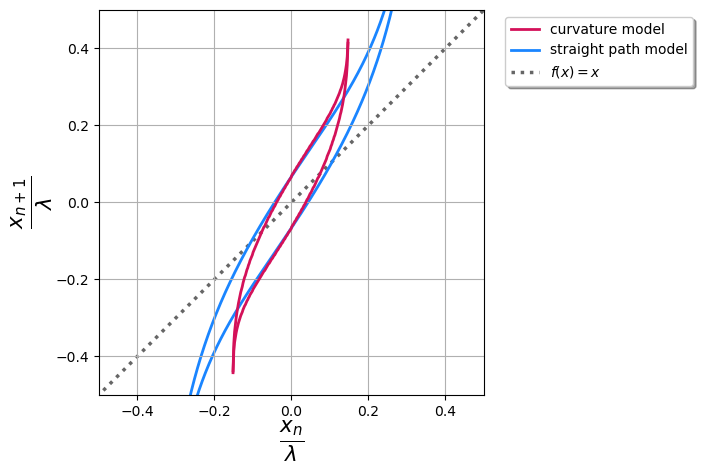

In [47]:
%matplotlib inline

fig18 = plt.figure(figsize = (5,5))


plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.gca().set_aspect('equal', adjustable='box')


xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')


#### MODEL CURVATURE

# initial set-up: one vein at x = 0
lbda = 0.2

# 1) calculer dy/dx
slope_vec = np.sign(init_x) * slope(init_x, T, a)

# 2) calculer d2y/d2x
dx = init_x[1:] - init_x[:-1]
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

# 3) calculer dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# 4) calculer dl 
dy = slope_vec[1:] * dx
dl = np.sqrt(dx**2 + dy**2)

# 5) calculer dn 

dn  = dl / abs(slope_vec[1:])



# 6) intégrer dl * dtheta/ds sur x
dn_dtheta_ds = dn * dtheta_ds 
dn_dtheta_ds = np.flip(dn_dtheta_ds)

x_final_list = []
x1p_list = []
x1m_list = []
indice_list = []


for i in range(len(dn_dtheta_ds)):
    cum_sum = np.cumsum(dn_dtheta_ds[i:])
    sup = np.where(cum_sum > 1/2)[0]
    if len(sup) > 0:
        sup = sup[0]
        indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
        indice = len(init_x) - indice
        #print(i, indice, sup)
        indice_list.append(indice)
        x_final = init_x[indice] 
        x_final_list.append(x_final)
    
        slope_x_final = np.sign(x_final) * slope(x_final, T, a)

        cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

# compute x1p et x1m
        x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
        x1m = x_final - cos_theta_final * (lbda / 3)    
        
        x1p_list.append(x1p)
        x1m_list.append(x1m)
        
# 7) create coordinates array and delete doubles (we find ourselves several times at the same index)
coordinates_flip = np.array([(x_final_list), (x1p_list), (x1m_list)])
coordinates_flip = np.unique(coordinates, axis=1)


plt.plot(coordinates_flip[0,:], coordinates_flip[1,:], color = '#D41159', label = 'curvature model', linewidth = 2, zorder = 2)
plt.plot(coordinates_flip[0,:], coordinates_flip[2,:], color = '#D41159', linewidth = 2, zorder = 2)

## add slope value

ind = np.where((coordinates_flip[0,:] < 0.05) & (coordinates_flip[0,:] > - 0.05))

X = coordinates_flip[0,ind] - coordinates_flip[0,ind].mean()
Y = coordinates_flip[1,ind] - coordinates_flip[1,ind].mean()

X = np.squeeze(np.asarray(X))

Y = np.squeeze(np.asarray(Y))

slope_iterate = (X.dot(Y)) / (X.dot(X))
print(slope_iterate)


#### PREVIOUS MODEL

# initial set-up: one vein at x = 0
x0 = 0
nb_division = 30
dist_points = init_x[1:] - init_x[:-1]  # init_x are the initial x position of the front
dist_points = dist_points.mean() # suppose the distance between points is a constant
level = 30

# compute dy/dx
slope_vec = - np.sign(init_x) * slope(init_x, T, a)
    
# compute sin(theta) and cos(theta)
sin_theta = slope_vec * 1 / np.sqrt(1 + slope_vec**2)
cos_theta = 1 / np.sqrt(1 + slope_vec**2)

# compute d2y/d2x
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dist_points   #border condition, the size of der_slop_vec is slope_vec - 1

# compute dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# compute T
T_0 = 1 / (2 * dtheta_ds)

# compute x1p et x1m
x1p = init_x[1:] + T_0 * sin_theta[1:] + cos_theta[1:] * (lbda / 3)  # why don't we do a while loop on x position ?
x1m = init_x[1:] + T_0 * sin_theta[1:] - cos_theta[1:] * (lbda / 3)

# the third part is too small compared to the second  to make any difference :/




plt.plot(init_x[1:], x1p, label = 'straight path model', color = '#1A85FF', linewidth = 2, zorder = 1)
plt.plot(init_x[1:], x1m, color = '#1A85FF', linewidth = 2, zorder = 1)



### FINISH
x = np.linspace(-80, 80, NB_POINTS)
plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 0)

plt.xticks(np.arange(-0.4,0.41,0.2))
plt.yticks(np.arange(-0.4,0.41,0.2))

plt.grid(True, zorder = 0)

plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
          ncol=1, fancybox=True, shadow=True)

## add slope value

ind = np.where((init_x[1:] < 0.05) & (init_x[1:] > - 0.05))

X = init_x[ind] - init_x[ind].mean()
Y = x1p[ind] - x1p[ind].mean()

slope_iterate = (X.dot(Y)) / (X.dot(X))
print(slope_iterate)



# save

plt.show()

fig18.savefig("iterate_straight_curvature.pdf", bbox_inches='tight') 

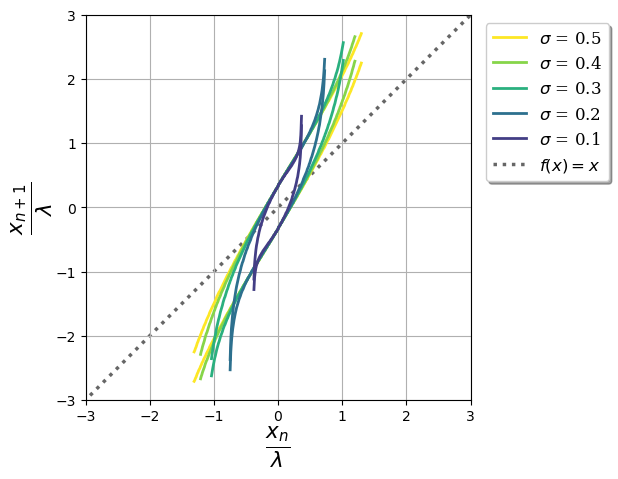

In [48]:
   
fig_it1_sigma = plt.figure(figsize = (5,5))




# initial set-up: one vein at x = 0
lbda = 0.2

viridis = cm.get_cmap('viridis', 12)

mu = 0
c = 0.2
for sig in np.flip(np.arange(0.1, 0.6, 0.1)):
    
    viridis_value = sig  / 0.5
    
    # 1) calculer dy/dx
    slope_vec = slope_gaussian(init_x, mu, sig, c)   # slope_vec = np.sign(init_x) * slope(init_x, T, a)
    #print(slope_vec)

    # 2) calculer d2y/d2x
    dx = init_x[1:] - init_x[:-1]
    der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

    # 3) calculer dtheta/ds
    dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

    # 4) calculer dl 
    dy = slope_vec[1:] * dx
    dl = np.sqrt(dx**2 + dy**2)


    # 5) calculer dn 
    dn  = dl / abs(slope_vec[1:])   #abs is needed if dy dx has the right signs

    # 6) intégrer dl * dtheta/ds sur x
    dn_dtheta_ds = dn * abs(dtheta_ds)

    x_final_list = []
    x1p_list = []
    x1m_list = []
    indice_list = []
    xi_list = []
    

    for i in range(len(dn_dtheta_ds)):
        if init_x[i] >= 0:
            cum_sum = np.cumsum(dn_dtheta_ds[i:])
            sup = np.where(cum_sum > 1/2)[0]
            if len(sup) > 0:             
                sup = sup[0]
                indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
                #print(i, indice, sup)
                indice_list.append(indice)
                x_final = init_x[indice] 
                x_final_list.append(x_final)
                slope_x_final = np.sign(x_final) * slope_gaussian(x_final, mu, sig, c)

                cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

                # compute x1p et x1m
                x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
                x1m = x_final - cos_theta_final * (lbda / 3)    

                x1p_list.append(x1p)
                x1m_list.append(x1m)

                # save x_i
                x_i = init_x[i]
                xi_list.append(x_i)

        if init_x[i] <= 0:
            cum_sum = np.cumsum(np.flip(dn_dtheta_ds[:i]))
            sup = np.where(cum_sum > 1/2)[0]
            if len(sup) > 0:
                sup = sup[0]
                indice = i - sup - 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
                #print(i, indice, sup)
                indice_list.append(indice)
                x_final = init_x[indice] 
                x_final_list.append(x_final)
                slope_x_final = np.sign(x_final) * slope_gaussian(x_final, mu, sig, c)

                cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

                # compute x1p et x1m
                x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
                x1m = x_final - cos_theta_final * (lbda / 3)   
                

                x1p_list.append(x1p)
                x1m_list.append(x1m)

                # save x_i
                x_i = init_x[i]
                xi_list.append(x_i)

    # 7) create coordinates array and delete doubles (we find ourselves several times at the same index)

    
    #print(slope_x_final)
    
    coordinates = np.array([(xi_list), (x1p_list), (x1m_list)])
    coordinates = np.unique(coordinates, axis=1)
    plt.plot(coordinates[0,:] / lbda, coordinates[1,:] / lbda, linewidth = 2, color=viridis(viridis_value), label = f"$\sigma$ = {sig:.1f}", zorder = 2)
    plt.plot(coordinates[0,:] / lbda, coordinates[2,:] / lbda, linewidth = 2, color=viridis(viridis_value), zorder = 2)
    
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xticks(np.arange(-3,3.1,1))
plt.yticks(np.arange(-3,3.1,1))
plt.gca().set_aspect('equal', adjustable='box')

plt.grid(True, zorder = 0)


xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')

x = np.linspace(-80, 80, NB_POINTS)
    
plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 1)

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})


fig_it1_sigma.savefig("iterate_sigma.pdf", bbox_inches='tight') 

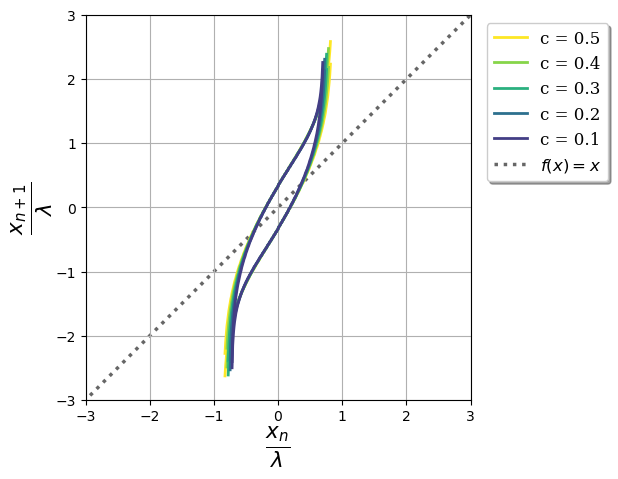

In [49]:
   
fig_it1_c = plt.figure(figsize = (5,5))




# initial set-up: one vein at x = 0
lbda = 0.2

viridis = cm.get_cmap('viridis', 12)

mu = 0
sig = 0.2


for c in np.flip(np.arange(0.1, 0.6, 0.1)):
    
    viridis_value = c  / 0.5
    
    # 1) calculer dy/dx
    slope_vec = slope_gaussian(init_x, mu, sig, c)   # slope_vec = np.sign(init_x) * slope(init_x, T, a)
    #print(slope_vec)

    # 2) calculer d2y/d2x
    dx = init_x[1:] - init_x[:-1]
    der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

    # 3) calculer dtheta/ds
    dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

    # 4) calculer dl 
    dy = slope_vec[1:] * dx
    dl = np.sqrt(dx**2 + dy**2)


    # 5) calculer dn 
    dn  = dl / abs(slope_vec[1:])   #abs is needed if dy dx has the right signs

    # 6) intégrer dl * dtheta/ds sur x
    dn_dtheta_ds = dn * abs(dtheta_ds)

    x_final_list = []
    x1p_list = []
    x1m_list = []
    indice_list = []
    xi_list = []
    

    for i in range(len(dn_dtheta_ds)):
        if init_x[i] >= 0:
            cum_sum = np.cumsum(dn_dtheta_ds[i:])
            sup = np.where(cum_sum > 1/2)[0]
            if len(sup) > 0:             
                sup = sup[0]
                indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
                #print(i, indice, sup)
                indice_list.append(indice)
                x_final = init_x[indice] 
                x_final_list.append(x_final)
                slope_x_final = np.sign(x_final) * slope_gaussian(x_final, mu, sig, c)

                cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

                # compute x1p et x1m
                x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
                x1m = x_final - cos_theta_final * (lbda / 3)    

                x1p_list.append(x1p)
                x1m_list.append(x1m)

                # save x_i
                x_i = init_x[i]
                xi_list.append(x_i)

        if init_x[i] <= 0:
            cum_sum = np.cumsum(np.flip(dn_dtheta_ds[:i]))
            sup = np.where(cum_sum > 1/2)[0]
            if len(sup) > 0:
                sup = sup[0]
                indice = i - sup - 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
                #print(i, indice, sup)
                indice_list.append(indice)
                x_final = init_x[indice] 
                x_final_list.append(x_final)
                slope_x_final = np.sign(x_final) * slope_gaussian(x_final, mu, sig, c)

                cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

                # compute x1p et x1m
                x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
                x1m = x_final - cos_theta_final * (lbda / 3)   
                

                x1p_list.append(x1p)
                x1m_list.append(x1m)

                # save x_i
                x_i = init_x[i]
                xi_list.append(x_i)

    # 7) create coordinates array and delete doubles (we find ourselves several times at the same index)

    
    #print(slope_x_final)
    
    coordinates = np.array([(xi_list), (x1p_list), (x1m_list)])
    coordinates = np.unique(coordinates, axis=1)
    plt.plot(coordinates[0,:] / lbda, coordinates[1,:] / lbda, linewidth = 2, color=viridis(viridis_value), label = f"c = {c:.1f}", zorder =2)
    plt.plot(coordinates[0,:] / lbda, coordinates[2,:] / lbda, linewidth = 2, color=viridis(viridis_value), zorder =2)
    
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xticks(np.arange(-3,3.1,1))
plt.yticks(np.arange(-3,3.1,1))
plt.grid(True, zorder = 0)
plt.gca().set_aspect('equal', adjustable='box')


xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')

x = np.linspace(-80, 80, NB_POINTS)
    
plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 1)

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})


fig_it1_c.savefig("iterate_c.pdf", bbox_inches='tight') 

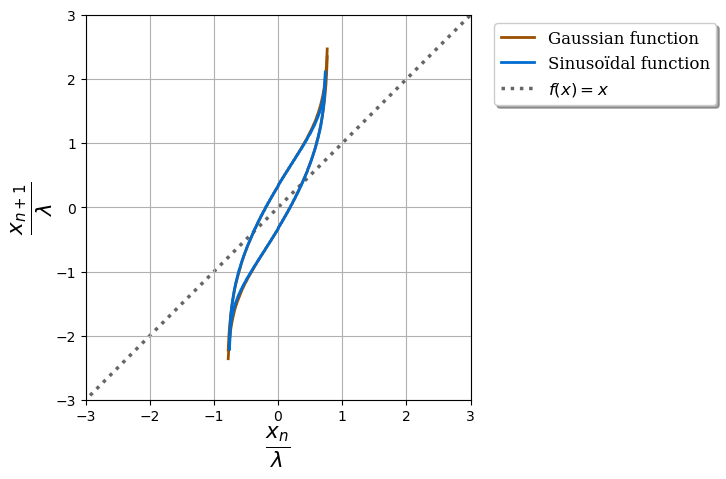

In [50]:
fig_compare = plt.figure(figsize = (5,5))


# GAUSSIAN


# initial set-up: one vein at x = 0
lbda = 0.2

mu = 0
sig = 0.22
c = 0.1

    
# 1) calculer dy/dx
slope_vec = slope_gaussian(init_x, mu, sig, c)   # slope_vec = np.sign(init_x) * slope(init_x, T, a)
#print(slope_vec)

# 2) calculer d2y/d2x
dx = init_x[1:] - init_x[:-1]
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

# 3) calculer dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# 4) calculer dl 
dy = slope_vec[1:] * dx
dl = np.sqrt(dx**2 + dy**2)


# 5) calculer dn 
dn  = dl / abs(slope_vec[1:])   #abs is needed if dy dx has the right signs

# 6) intégrer dl * dtheta/ds sur x
dn_dtheta_ds = dn * abs(dtheta_ds)

x_final_list = []
x1p_list = []
x1m_list = []
indice_list = []
xi_list = []
    

for i in range(len(dn_dtheta_ds)):
    if init_x[i] >= 0:
        cum_sum = np.cumsum(dn_dtheta_ds[i:])
        sup = np.where(cum_sum > 1/2)[0]
        if len(sup) > 0:             
            sup = sup[0]
            indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
            #print(i, indice, sup)
            indice_list.append(indice)
            x_final = init_x[indice] 
            x_final_list.append(x_final)
            slope_x_final = np.sign(x_final) * slope_gaussian(x_final, mu, sig, c)

            cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

            # compute x1p et x1m
            x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
            x1m = x_final - cos_theta_final * (lbda / 3)    

            x1p_list.append(x1p)
            x1m_list.append(x1m)

            # save x_i
            x_i = init_x[i]
            xi_list.append(x_i)

    if init_x[i] <= 0:
        cum_sum = np.cumsum(np.flip(dn_dtheta_ds[:i]))
        sup = np.where(cum_sum > 1/2)[0]
        if len(sup) > 0:
            sup = sup[0]
            indice = i - sup - 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
            #print(i, indice, sup)
            indice_list.append(indice)
            x_final = init_x[indice] 
            x_final_list.append(x_final)
            slope_x_final = np.sign(x_final) * slope_gaussian(x_final, mu, sig, c)

            cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

            # compute x1p et x1m
            x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
            x1m = x_final - cos_theta_final * (lbda / 3)   
                

            x1p_list.append(x1p)
            x1m_list.append(x1m)

            # save x_i
            x_i = init_x[i]
            xi_list.append(x_i)

# 7) create coordinates array and delete doubles (we find ourselves several times at the same index)

    
#print(slope_x_final)
    
coordinates = np.array([(xi_list), (x1p_list), (x1m_list)])
coordinates = np.unique(coordinates, axis=1)
plt.plot(coordinates[0,:] / lbda, coordinates[1,:] / lbda, linewidth = 2, color='#994F00', label = 'Gaussian function', zorder =2)
plt.plot(coordinates[0,:] / lbda, coordinates[2,:] / lbda, linewidth = 2, color='#994F00', zorder =2)


# FINGER

lbda = 0.2

a = 0.000001

    
# 1) calculer dy/dx
slope_vec = slope(init_x, T, a)   # slope_vec = np.sign(init_x) * slope(init_x, T, a)
#print(slope_vec)

# 2) calculer d2y/d2x
dx = init_x[1:] - init_x[:-1]
der_slope_vec = (slope_vec[1:] - slope_vec[:-1]) / dx

# 3) calculer dtheta/ds
dtheta_ds = der_slope_vec / (1 + slope_vec[1:]**2)**(3/2)

# 4) calculer dl 
dy = slope_vec[1:] * dx
dl = np.sqrt(dx**2 + dy**2)


# 5) calculer dn 
dn  = dl / abs(slope_vec[1:])   #abs is needed if dy dx has the right signs

# 6) intégrer dl * dtheta/ds sur x
dn_dtheta_ds = dn * abs(dtheta_ds)

x_final_list = []
x1p_list = []
x1m_list = []
indice_list = []
xi_list = []

for i in range(len(dn_dtheta_ds)):
    if init_x[i] >= 0:
        cum_sum = np.cumsum(dn_dtheta_ds[i:])
        sup = np.where(cum_sum > 1/2)[0]
        if len(sup) > 0:
            sup = sup[0]
            indice = i + sup + 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
            #print(i, indice, sup)
            indice_list.append(indice)
            x_final = init_x[indice] 
            x_final_list.append(x_final)
            slope_x_final = np.sign(x_final) * slope(x_final, T, a)

            cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

            # compute x1p et x1m
            x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
            x1m = x_final - cos_theta_final * (lbda / 3)    
        
            x1p_list.append(x1p)
            x1m_list.append(x1m)
        
            # save x_i
            x_i = init_x[i]
            xi_list.append(x_i)
            
    if init_x[i] <= 0:
        cum_sum = np.cumsum(np.flip(dn_dtheta_ds[:i]))
        sup = np.where(cum_sum > 1/2)[0]
        if len(sup) > 0:
            sup = sup[0]
            indice = i - sup - 1  #+ 1 car init_x[0] ne correspond pas à der_slope_vec
            #print(i, indice, sup)
            indice_list.append(indice)
            x_final = init_x[indice] 
            x_final_list.append(x_final)
            slope_x_final = np.sign(x_final) * slope(x_final, T, a)

            cos_theta_final = 1 / np.sqrt(1 + slope_x_final**2)

            # compute x1p et x1m
            x1p = x_final + cos_theta_final * (lbda / 3)  # why don't we do a while loop on x position ?
            x1m = x_final - cos_theta_final * (lbda / 3)    
        
            x1p_list.append(x1p)
            x1m_list.append(x1m)
        
            # save x_i
            x_i = init_x[i]
            xi_list.append(x_i)
            
# 7) create coordinates array and delete doubles (we find ourselves several times at the same index)


coordinates = np.array([(xi_list), (x1p_list), (x1m_list)])
coordinates = np.unique(coordinates, axis=1)

plt.plot(coordinates[0,:] / lbda, coordinates[1,:] / lbda, color = '#006CD1', label = 'Sinusoïdal function', linewidth = 2, zorder = 2)
plt.plot(coordinates[0,:] / lbda, coordinates[2,:] / lbda, color = '#006CD1', linewidth = 2, zorder = 2)




# ALL
    
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xticks(np.arange(-3,3.1,1))
plt.yticks(np.arange(-3,3.1,1))
plt.grid(True, zorder = 0)
plt.gca().set_aspect('equal', adjustable='box')


xlab = r'$\frac{x_{n}}{\lambda}$'
ylab = r'$\frac{x_{n+1}}{\lambda}$'
plt.xlabel(xlab, fontsize=22, labelpad = 0, fontfamily = 'serif')
plt.ylabel(ylab, fontsize=22, labelpad = 0, fontfamily = 'serif')

x = np.linspace(-80, 80, NB_POINTS)
    
plt.plot(x,x, color = 'black', linestyle = ':', alpha = 0.6, label = r'$f(x) = x$', linewidth = 2.5, zorder = 1)

plt.legend(loc='upper center', bbox_to_anchor=(1.35, 1),
          ncol=1, fancybox=True, shadow=True, prop={'size': 12, 'family': 'serif'})

fig_compare.savefig("iterate_gaussian_sinus.pdf", bbox_inches='tight') 